<h1><b><center> Personal Loan Campaign </center></b></h1>

# Problem Statement

- AllLife Bank is a US bank that interested convert the liability customers to personal loan customers. 
- As data scientist, we need to build a model to help the marketing department to identify the potential customers that have higher probability of purchasing the loan.

# Objective

- Perform an Exploratory Data Analysis, including data structure, univariate and bivirate analysis.
- Data pre-processing: treat missing values, outlier and feature engineering.
- Build the models.
- Predict whether a liability customer will buy a personal loan.
- Identify which variables are the most significant.
- Identify which segment of customers should be targeted more.

# Data

<b>Loan_Modelling.csv</b> - the raw data that is used for the project.

* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign?
* `Securities_Account`: Does the customer have securities account with the bank?
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank?
* `Online`: Do customers use internet banking facilities?
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?


## Import the necessary packages

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# resize the pictures:
plt.rc("figure", figsize=[10, 6])


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build model for prediction

from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# Get the uszipcode package
#!pip install uszipcode
from uszipcode import SearchEngine

from sklearn import metrics

<IPython.core.display.Javascript object>

## Read the dataset

In [2]:
loan = pd.read_csv("Loan_Modelling.csv")

<IPython.core.display.Javascript object>

In [3]:
# copy the data to another variable to avoid overwritting the original data
data = loan.copy()

<IPython.core.display.Javascript object>

# Data background and contents - Data Structure Overview

In [4]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<IPython.core.display.Javascript object>

- We can remove the ID column and use the default one. 
- For ZIPCode variable, since there are a lot of zipcodes, we are going to convert zipcodes to county for easier analysis.

## Remove ID column

In [5]:
data.drop(["ID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

## Convert ZIPCode variable to county

In [6]:
search = SearchEngine(simple_zipcode=False)

<IPython.core.display.Javascript object>

In [7]:
# create a function to find County from zipcode:
def find_county(zipcode):
    county = search.by_zipcode(zipcode).county
    if county is None:
        county = zipcode
    return county

<IPython.core.display.Javascript object>

In [8]:
data["County"] = data["ZIPCode"].apply(find_county)

<IPython.core.display.Javascript object>

In [9]:
data["County"].value_counts()

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Marin County                54
Kern County                 54
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
92717                       22
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Tuolumne

<IPython.core.display.Javascript object>

- New variable County is created. There are some zipcodes that package cannot find the county. Hence, we keep zipcode as it is.
- We are going to drop ZIPCode variable.

In [10]:
data.drop(["ZIPCode"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [11]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County
0,25,1,49,4,1.6,1,0,0,1,0,0,0,Los Angeles County
1,45,19,34,3,1.5,1,0,0,1,0,0,0,Los Angeles County
2,39,15,11,1,1.0,1,0,0,0,0,0,0,Alameda County
3,35,9,100,1,2.7,2,0,0,0,0,0,0,San Francisco County
4,35,8,45,4,1.0,2,0,0,0,0,0,1,Los Angeles County


<IPython.core.display.Javascript object>

## Understand the shape of the data


In [12]:
data.shape

(5000, 13)

<IPython.core.display.Javascript object>

- There are 5000 rows and 13 columns in the dataset.

## Check the data types of the columns for the dataset

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
 12  County              5000 non-null   object 
dtypes: float64(1), int64(11), object(1)
memory usage: 507.9+ KB


<IPython.core.display.Javascript object>

- Most of the columns in the dataset are integer, except CCAvg column is float.
- The target variable Personal_Loan has integer type.

## Check for duplicates

In [14]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There are no duplicate values in the dataset.

## Check summary statistics of the dataset

In [15]:
data.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<IPython.core.display.Javascript object>

- Mean and median of column Age, Experience, and Family are similar. Hence, the distributions are unskewed.
- Mean of column Income, CCAvg, and Mortgage are greater than the median. Hence, the distributions are right skewed.
- The minimum of Experience variable is -3. We might need to investigate further.

## Check missing values in dataset

In [16]:
data.isna().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
County                0
dtype: int64

<IPython.core.display.Javascript object>

- There are no missing values in the dataset.

# Univariate Data Analysis

- We are going to create a function that will return boxplot and histogram.

In [17]:
def generate_plot(data, feature, figsize=(10, 6), kde=True, bins=None):
    """
    Description:
    This is the function that generate both boxplot and histogram for any input numerical variable.

    Inputs:
    data: dataframe of the dataset
    feature: dataframe column
    figsize: size of figure (default (10,6))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)

    Output:
    Boxplot and histogram
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # This is for boxplot
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")

    # This is for histogram
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)

    # Add mean to the histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")

    # Add median to the histogram
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

<IPython.core.display.Javascript object>

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
 12  County              5000 non-null   object 
dtypes: float64(1), int64(11), object(1)
memory usage: 507.9+ KB


<IPython.core.display.Javascript object>

## Observation on Age

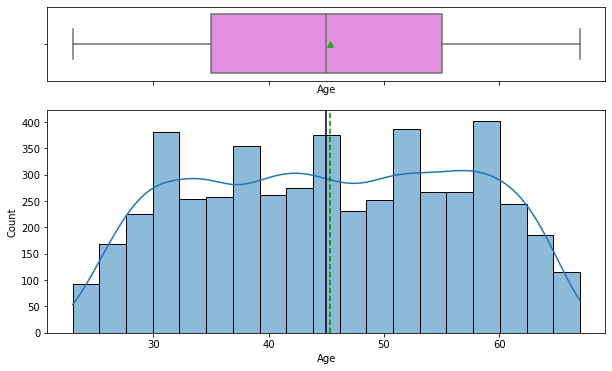

<IPython.core.display.Javascript object>

In [19]:
generate_plot(data, "Age")

- There are no outliers in Age variable.
- The distribution is unskewed.

## Observation on Experience

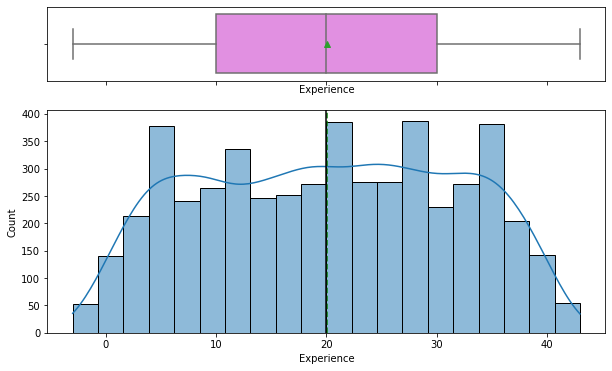

<IPython.core.display.Javascript object>

In [20]:
generate_plot(data, "Experience")

- There are no outliers in Experience variable.
- The distribution is unskewed.

## Observation on Income

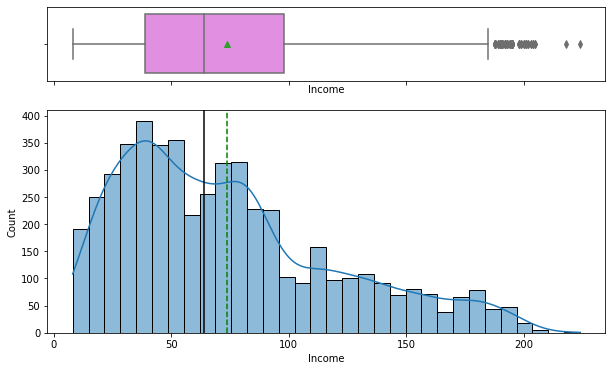

<IPython.core.display.Javascript object>

In [21]:
generate_plot(data, "Income")

- The boxplot shows that there are outliers on the right.
- The distribution of Income is right skewed.

## Observation on Family

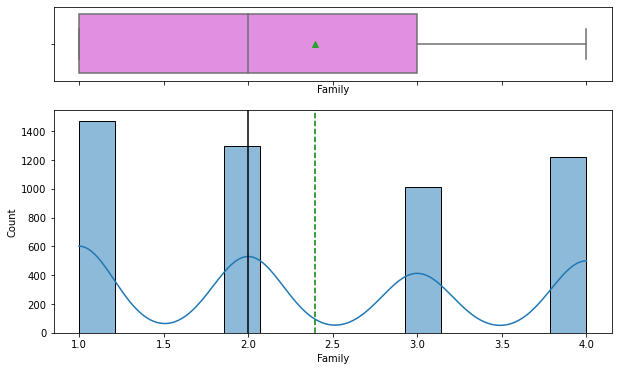

<IPython.core.display.Javascript object>

In [22]:
generate_plot(data, "Family")

- There are no outliers in Family variable.

## Observation on CCAvg

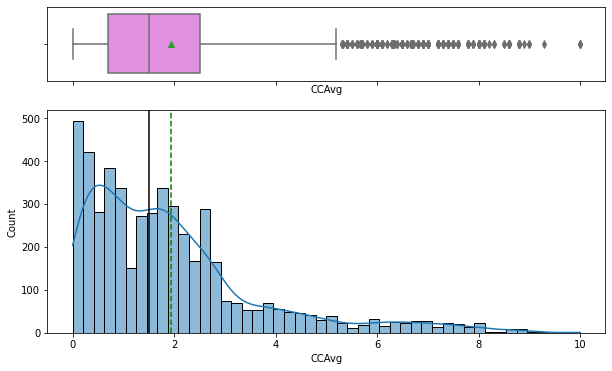

<IPython.core.display.Javascript object>

In [23]:
generate_plot(data, "CCAvg")

- There are outliers on the right of the boxplot.
- The distribution is right-skewed.

## Observation on Education

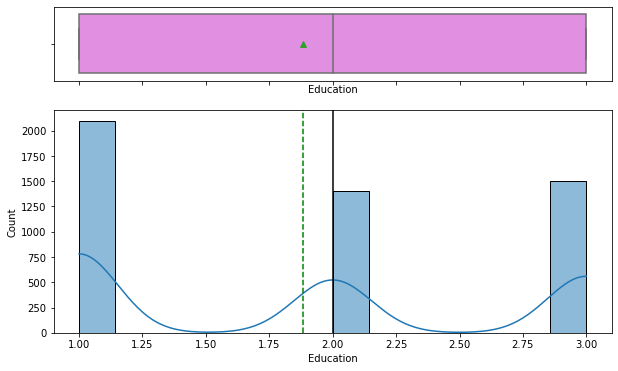

<IPython.core.display.Javascript object>

In [24]:
generate_plot(data, "Education")

- There are no outliers in the Education variable.

## Observations on Mortgage

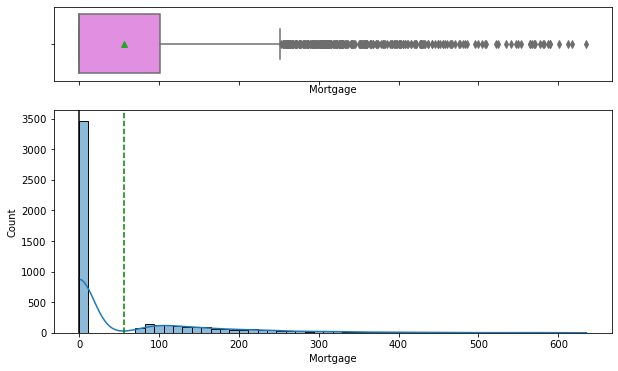

<IPython.core.display.Javascript object>

In [25]:
generate_plot(data, "Mortgage")

- The boxplot shows that there are outliers on the right side.
- The distribution is right-skewed.

## Observations on non-numerical variables

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
 12  County              5000 non-null   object 
dtypes: float64(1), int64(11), object(1)
memory usage: 507.9+ KB


<IPython.core.display.Javascript object>

- We are going to create a function to count the values of each type in each variable and display plots.

In [27]:
def count_statistic(dataframe, feature):
    '''
    Description:
    This is a function to count the values of each type in each variable, and also do the percentage of each type.
    
    Inputs:
    dataframe - the dataset
    feature - the column name
    
    Output:
    Count of each type and percentage
    '''
    
    count_values = dataframe[feature].value_counts()
    print('Counting:')
    print(count_values)
    print('\n')
    print('Population proportion:')
    print(count_values/count_values.sum())


<IPython.core.display.Javascript object>

In [28]:
def generate_countplot(data, feature):
    """
    Description:
    This is a function to do countplot

    Inputs:
    data - the dataset
    feature - the column name

    Output:
    The count plot
    """
    sns.countplot(data=data, x=feature)

<IPython.core.display.Javascript object>

## Observation on Personal_Loan 

In [29]:
count_statistic(data, "Personal_Loan")

Counting:
0    4520
1     480
Name: Personal_Loan, dtype: int64


Population proportion:
0    0.904
1    0.096
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

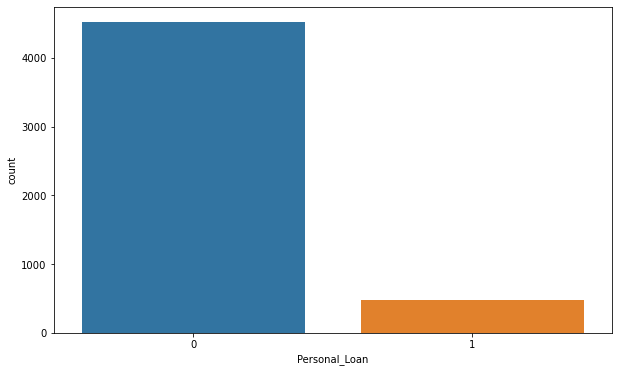

<IPython.core.display.Javascript object>

In [30]:
generate_countplot(data, "Personal_Loan")

- There are bout 4520 customers, which is 90.4% that do not accept the personal loan offered during the last campaign. Only 480 customers do.

## Observation on Securities_Account

In [31]:
count_statistic(data, "Securities_Account")

Counting:
0    4478
1     522
Name: Securities_Account, dtype: int64


Population proportion:
0    0.8956
1    0.1044
Name: Securities_Account, dtype: float64


<IPython.core.display.Javascript object>

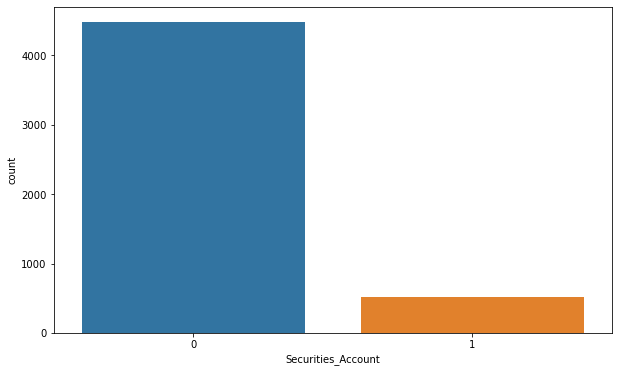

<IPython.core.display.Javascript object>

In [32]:
generate_countplot(data, "Securities_Account")

- There are 4478 customers, which is 89.56% that do not have securities account with the bank, while 522 customers do.

## Observation on CD_Account

In [33]:
count_statistic(data, "CD_Account")

Counting:
0    4698
1     302
Name: CD_Account, dtype: int64


Population proportion:
0    0.9396
1    0.0604
Name: CD_Account, dtype: float64


<IPython.core.display.Javascript object>

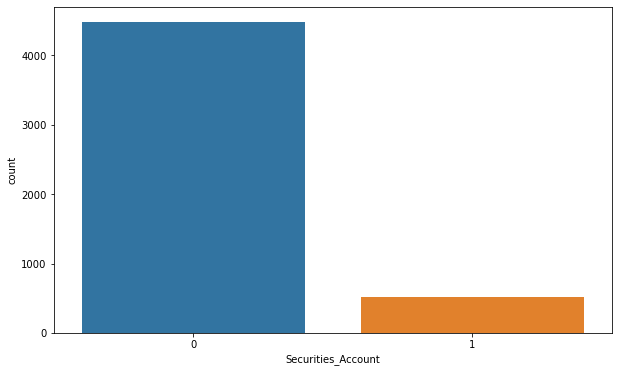

<IPython.core.display.Javascript object>

In [34]:
generate_countplot(data, "Securities_Account")

- There are 4698 customers, which is 93.96% that don't have CD account, while 302 customers have.

## Observation on Online

In [35]:
count_statistic(data, "Online")

Counting:
1    2984
0    2016
Name: Online, dtype: int64


Population proportion:
1    0.5968
0    0.4032
Name: Online, dtype: float64


<IPython.core.display.Javascript object>

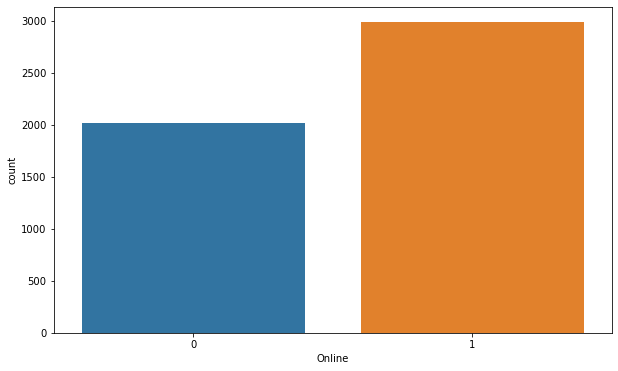

<IPython.core.display.Javascript object>

In [36]:
generate_countplot(data, "Online")

- There are 2984 customers have online banking account, which is 59.68%, while 2016 customers do not have.

## Observation on CreditCard

In [37]:
count_statistic(data, "CreditCard")

Counting:
0    3530
1    1470
Name: CreditCard, dtype: int64


Population proportion:
0    0.706
1    0.294
Name: CreditCard, dtype: float64


<IPython.core.display.Javascript object>

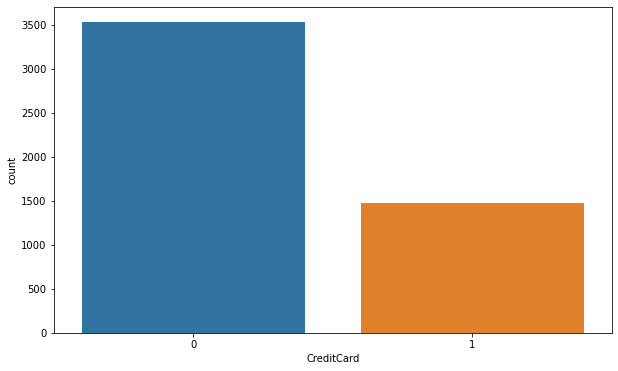

<IPython.core.display.Javascript object>

In [38]:
generate_countplot(data, "CreditCard")

- There are 3530 customers, which is 70.6% that don't have credit card, while 1470 customers have.

## Observation on County

In [39]:
count_statistic(data, "County")

Counting:
Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Marin County                54
Kern County                 54
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
92717                       22
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='count', ylabel='County'>

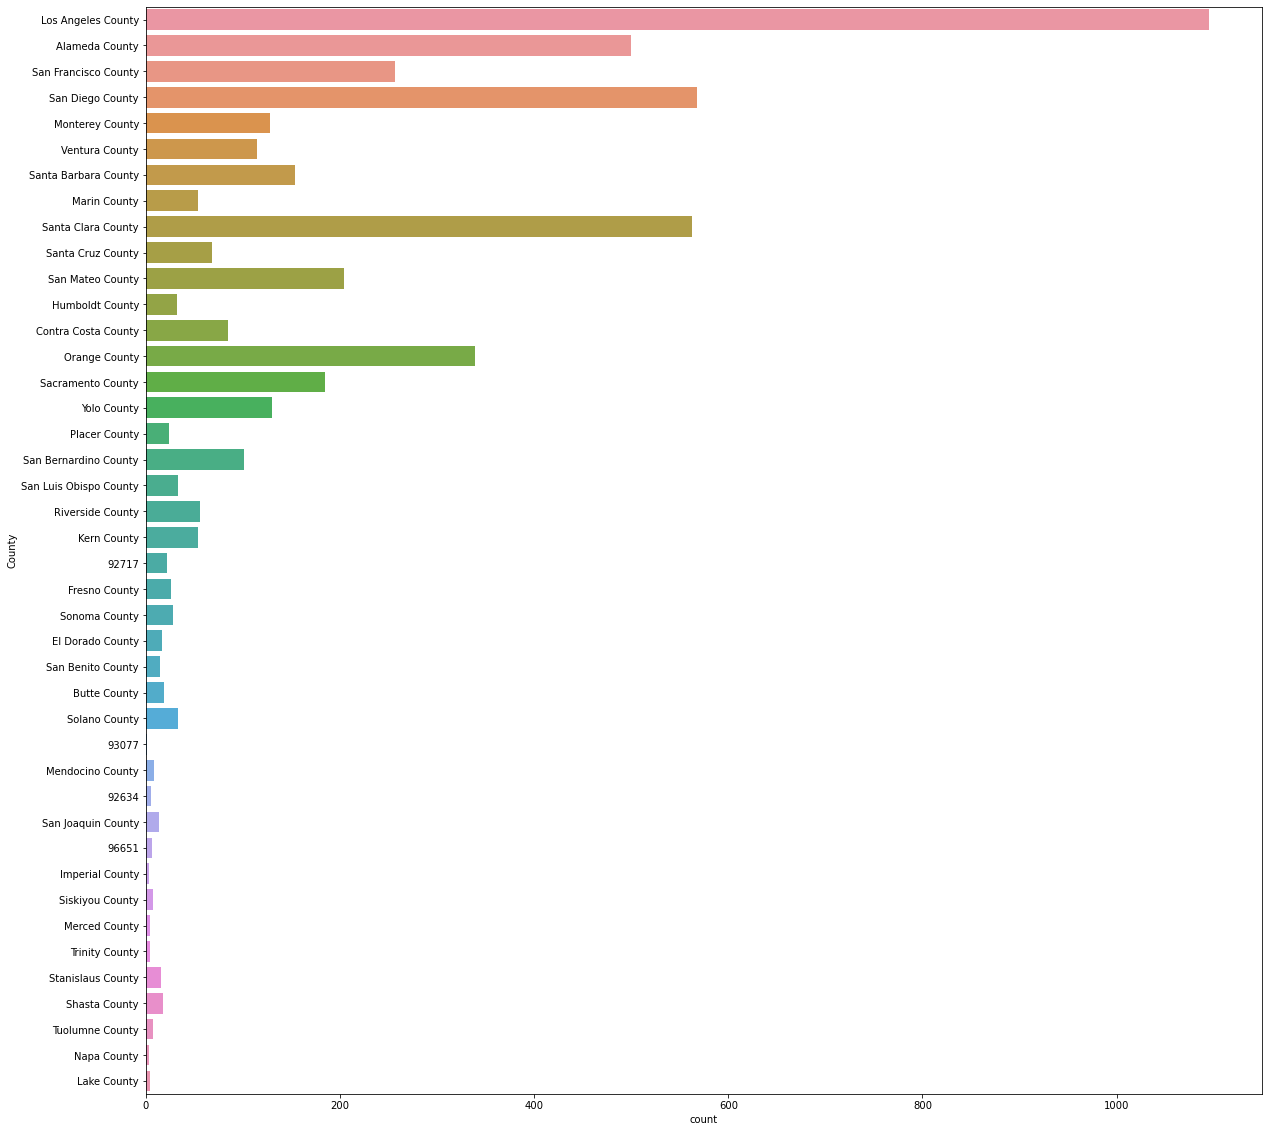

<IPython.core.display.Javascript object>

In [40]:
plt.rc("figure", figsize=[20, 20])
sns.countplot(data=data, y="County")

- Most customers live in Los Angeles county, and the second popular county is San Diego.

# Bivariate Data Analysis

- We are going to create correlation, and heatmap for the dataset.
- Besides, we are also going to look at the relationship between dependent variable Personal_Loan and independent variables.

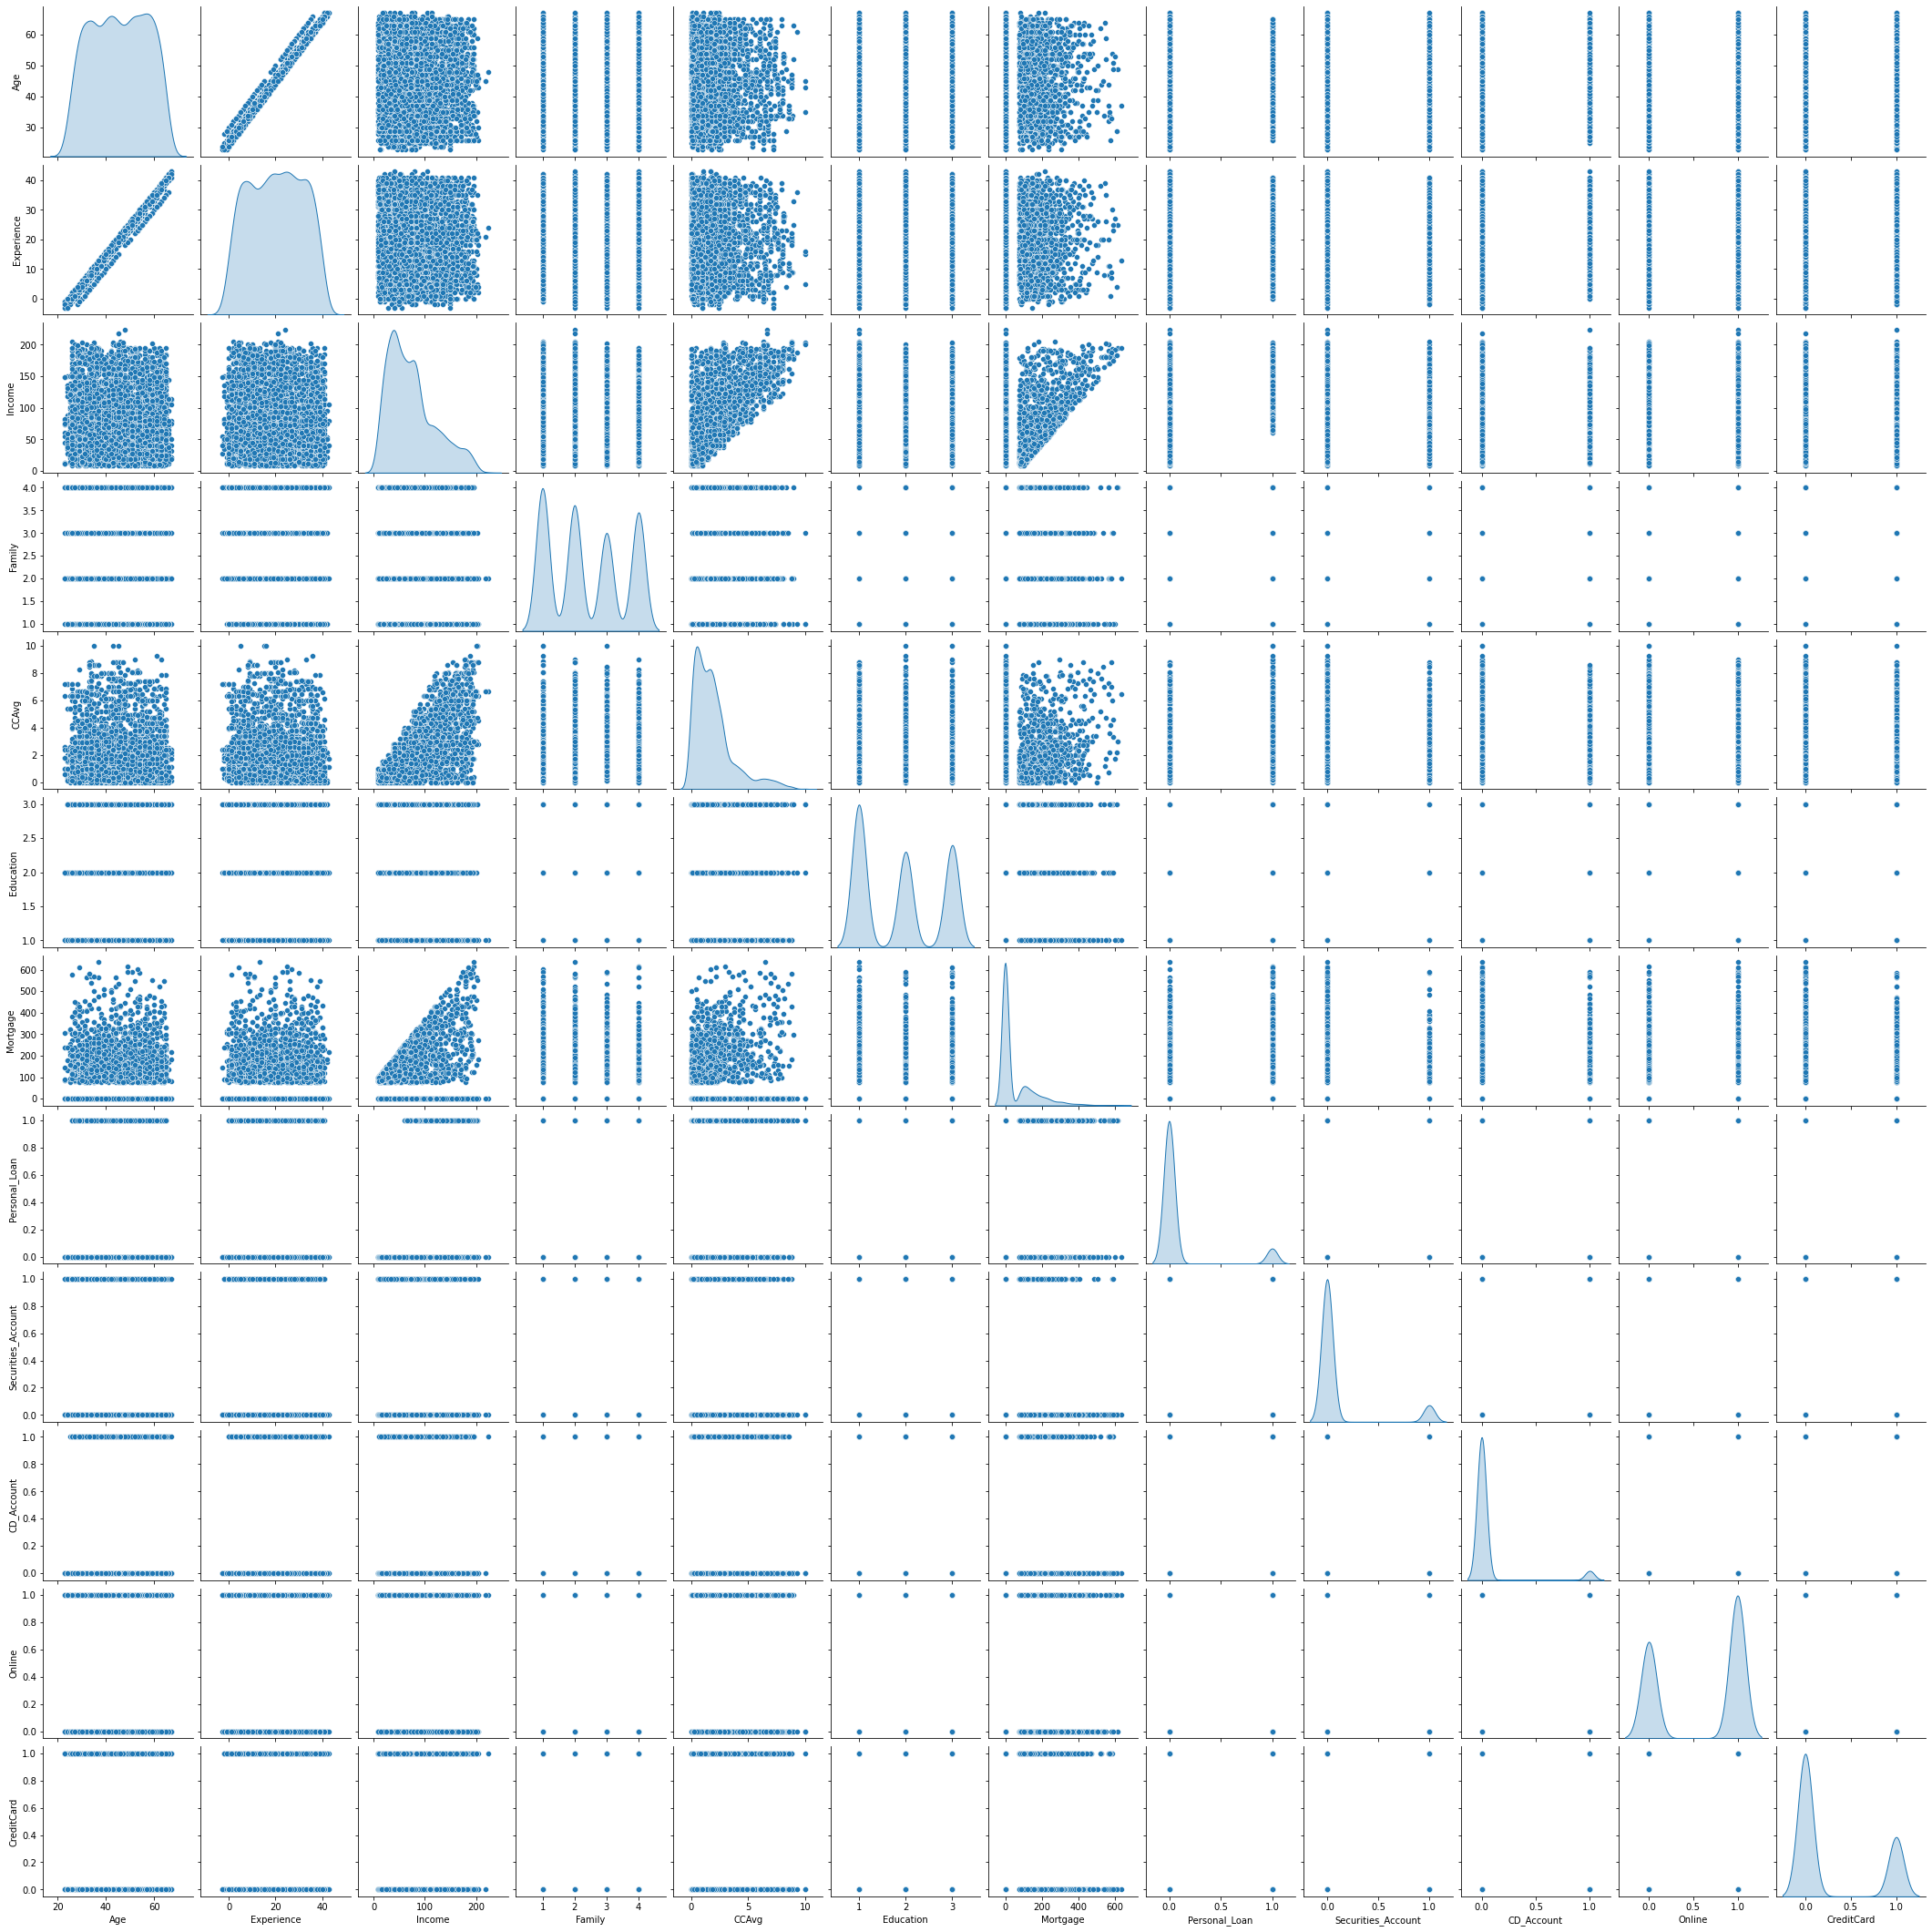

<IPython.core.display.Javascript object>

In [41]:
sns.pairplot(data, diag_kind="kde")

In [42]:
# 2-D matrix:
correlation = data.corr()
correlation

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities_Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD_Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


<IPython.core.display.Javascript object>

<AxesSubplot:>

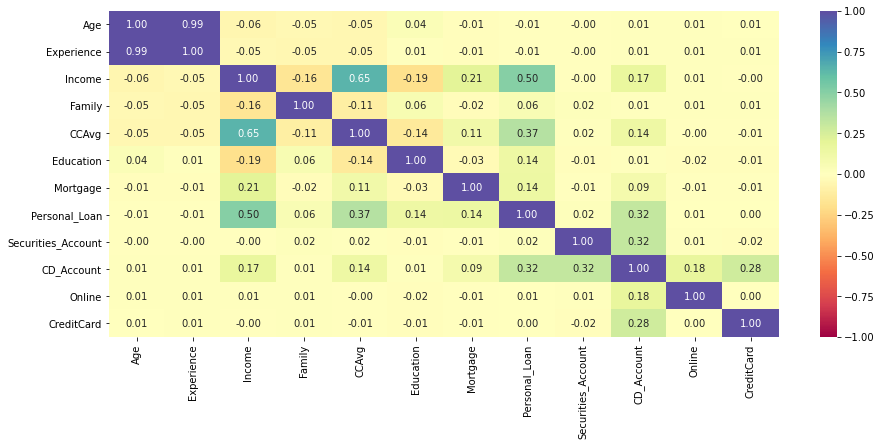

<IPython.core.display.Javascript object>

In [43]:
# heatmap:
plt.rc("figure", figsize=[15, 6])
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

- There are correlation between Income, CCAVg and Personal_Loan
- There is high correlation betwen Age and Experience.
- There is no significant correlation between columns.

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
 12  County              5000 non-null   object 
dtypes: float64(1), int64(11), object(1)
memory usage: 507.9+ KB


<IPython.core.display.Javascript object>

In [45]:
# Create a function to do stacked plot:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(20, 6))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

## Personal_Loan with Age

Personal_Loan     0    1   All
Age                           
All            4520  480  5000
34              116   18   134
30              119   17   136
36               91   16   107
63               92   16   108
35              135   16   151
33              105   15   120
52              130   15   145
29              108   15   123
54              128   15   143
43              134   15   149
42              112   14   126
56              121   14   135
65               66   14    80
44              107   14   121
50              125   13   138
45              114   13   127
46              114   13   127
26               65   13    78
32              108   12   120
57              120   12   132
38              103   12   115
27               79   12    91
48              106   12   118
61              110   12   122
53              101   11   112
51              119   10   129
60              117   10   127
58              133   10   143
49              105   10   115
47      

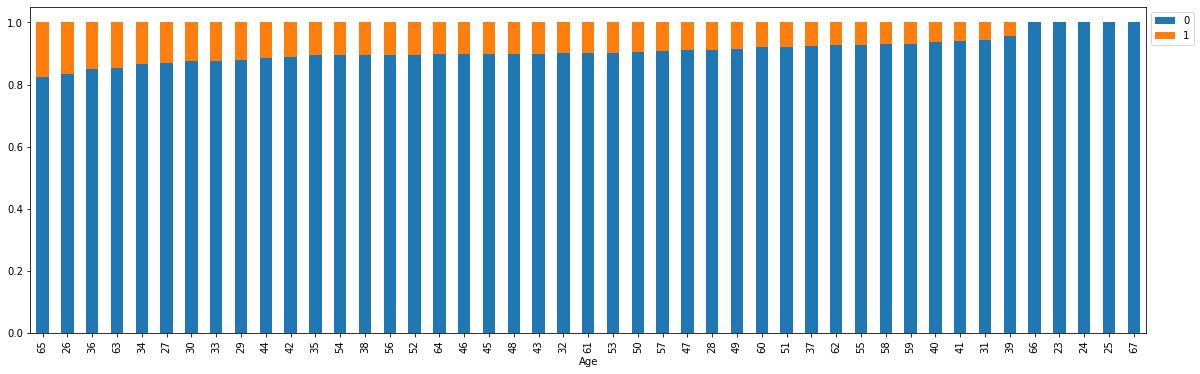

<IPython.core.display.Javascript object>

In [46]:
stacked_barplot(data, "Age", "Personal_Loan")

<AxesSubplot:xlabel='Age', ylabel='Personal_Loan'>

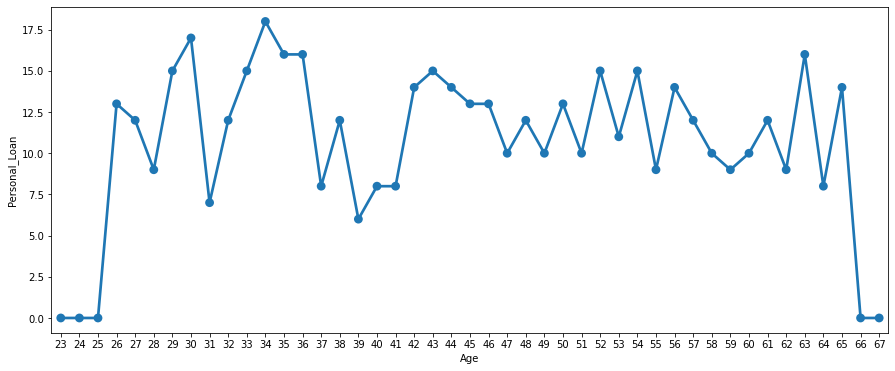

<IPython.core.display.Javascript object>

In [47]:
sns.pointplot(x="Age", y="Personal_Loan", data=data, estimator=sum, ci=None)

- Customers with older than 25 years and less than 66 years old likely to accept the personal loan offered in the last campaign.

## Personal_Loan with Experience

Personal_Loan     0    1   All
Experience                    
All            4520  480  5000
9               127   20   147
8               101   18   119
20              131   17   148
3               112   17   129
12               86   16   102
32              140   14   154
19              121   14   135
5               132   14   146
25              128   14   142
26              120   14   134
37              103   13   116
11              103   13   116
16              114   13   127
30              113   13   126
22              111   13   124
35              130   13   143
23              131   13   144
36              102   12   114
29              112   12   124
7               109   12   121
6               107   12   119
18              125   12   137
31               92   12   104
28              127   11   138
21              102   11   113
13              106   11   117
17              114   11   125
34              115   10   125
39               75   10    85
27      

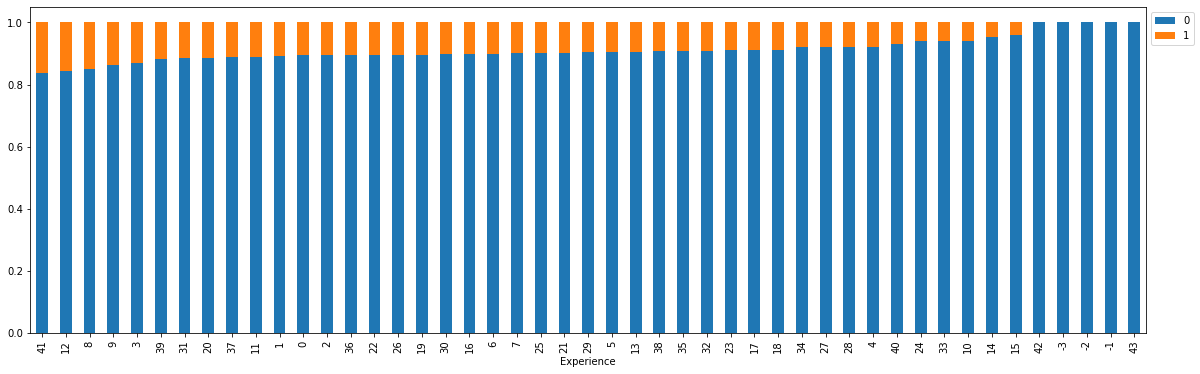

<IPython.core.display.Javascript object>

In [48]:
stacked_barplot(data, "Experience", "Personal_Loan")

<AxesSubplot:xlabel='Experience', ylabel='Personal_Loan'>

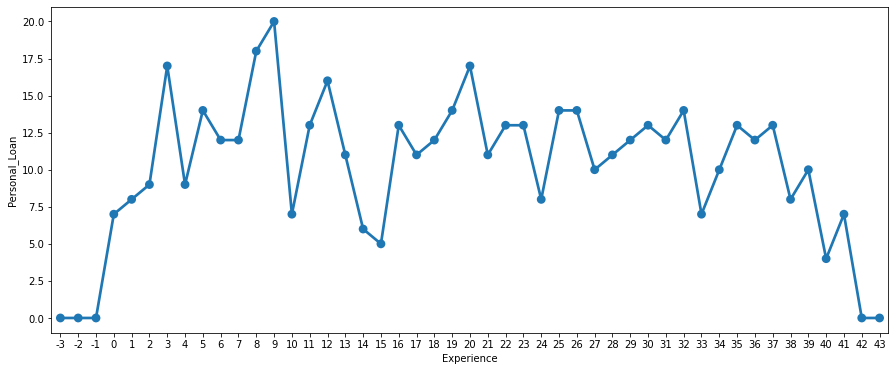

<IPython.core.display.Javascript object>

In [49]:
sns.pointplot(x="Experience", y="Personal_Loan", data=data, estimator=sum, ci=None)

- The plot shows that there experience of -3, -2 and -1. This might be a mistake since the minimum year of experience should be 0. 
- As the professional experience of years increase, the less likely customers accept the personal loan offered.

## Personal_Loan with Income

Personal_Loan     0    1   All
Income                        
All            4520  480  5000
130               8   11    19
182               2   11    13
158               8   10    18
135               8   10    18
179               8    9    17
141              15    9    24
154              12    9    21
123               9    9    18
184               3    9    12
142               7    8    15
131              11    8    19
129              15    8    23
172               3    8    11
173               5    8    13
170               4    8    12
180              10    8    18
115              19    8    27
125              16    7    23
164               6    7    13
188               3    7    10
83               67    7    74
114              23    7    30
161               9    7    16
122              17    7    24
133               8    7    15
132              11    7    18
191               6    7    13
134              13    7    20
111              15    7    22
190     

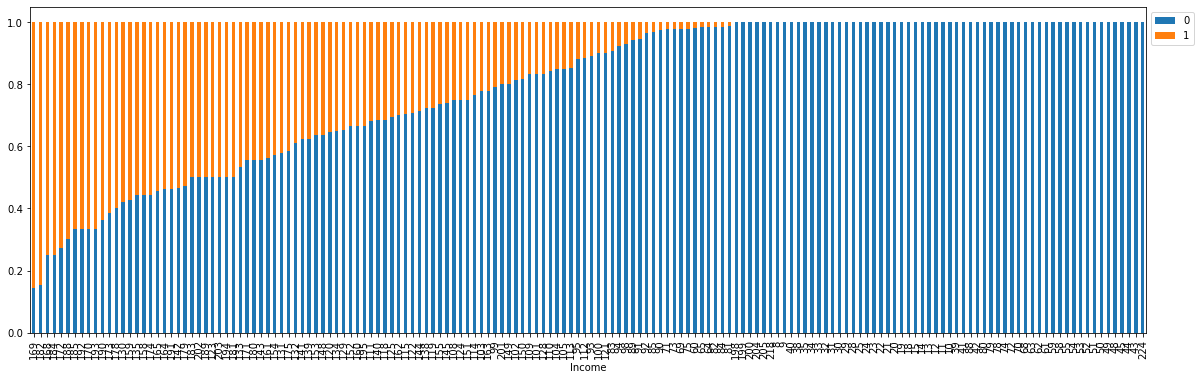

<IPython.core.display.Javascript object>

In [50]:
stacked_barplot(data, "Income", "Personal_Loan")

<AxesSubplot:xlabel='Income', ylabel='Personal_Loan'>

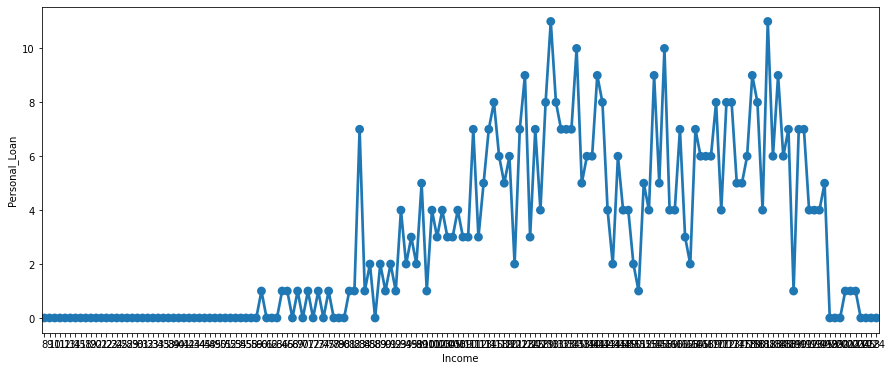

<IPython.core.display.Javascript object>

In [51]:
sns.pointplot(x="Income", y="Personal_Loan", data=data, estimator=sum, ci=None)

<AxesSubplot:xlabel='Personal_Loan', ylabel='Income'>

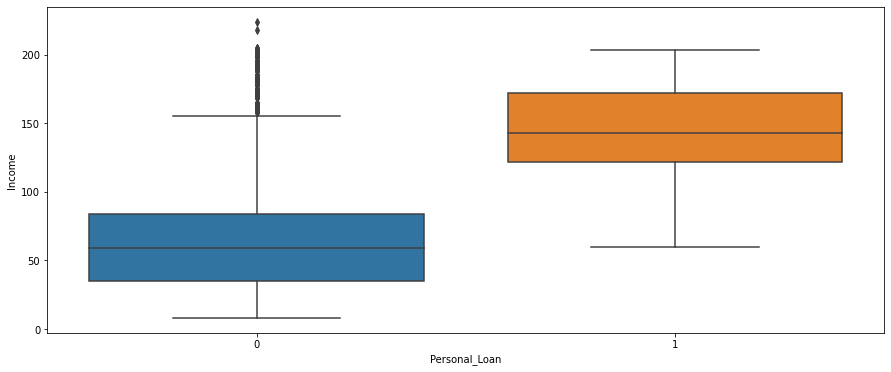

<IPython.core.display.Javascript object>

In [52]:
sns.boxplot(data=data, x="Personal_Loan", y="Income")

- As the income increases, the more customers accept the personal loan offered.
- The customers that have highest income less likely to accept the personal loan offered.

## Personal_Loan with County

Personal_Loan              0    1   All
County                                 
All                     4520  480  5000
Los Angeles County       984  111  1095
Santa Clara County       492   71   563
San Diego County         509   59   568
Alameda County           456   44   500
Orange County            309   30   339
San Francisco County     238   19   257
Monterey County          113   15   128
Sacramento County        169   15   184
Contra Costa County       73   12    85
San Mateo County         192   12   204
Ventura County           103   11   114
Santa Barbara County     143   11   154
Santa Cruz County         60    8    68
Yolo County              122    8   130
Kern County               47    7    54
Sonoma County             22    6    28
Riverside County          50    6    56
Marin County              48    6    54
San Luis Obispo County    28    5    33
Solano County             30    3    33
Shasta County             15    3    18
92717                     19    3    22


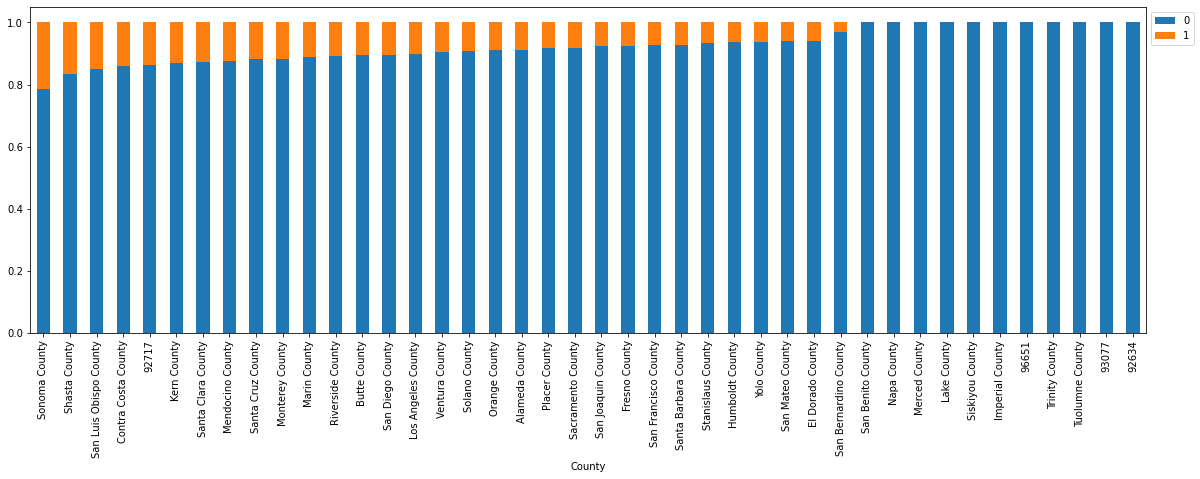

<IPython.core.display.Javascript object>

In [53]:
stacked_barplot(data, "County", "Personal_Loan")

<AxesSubplot:xlabel='Personal_Loan', ylabel='County'>

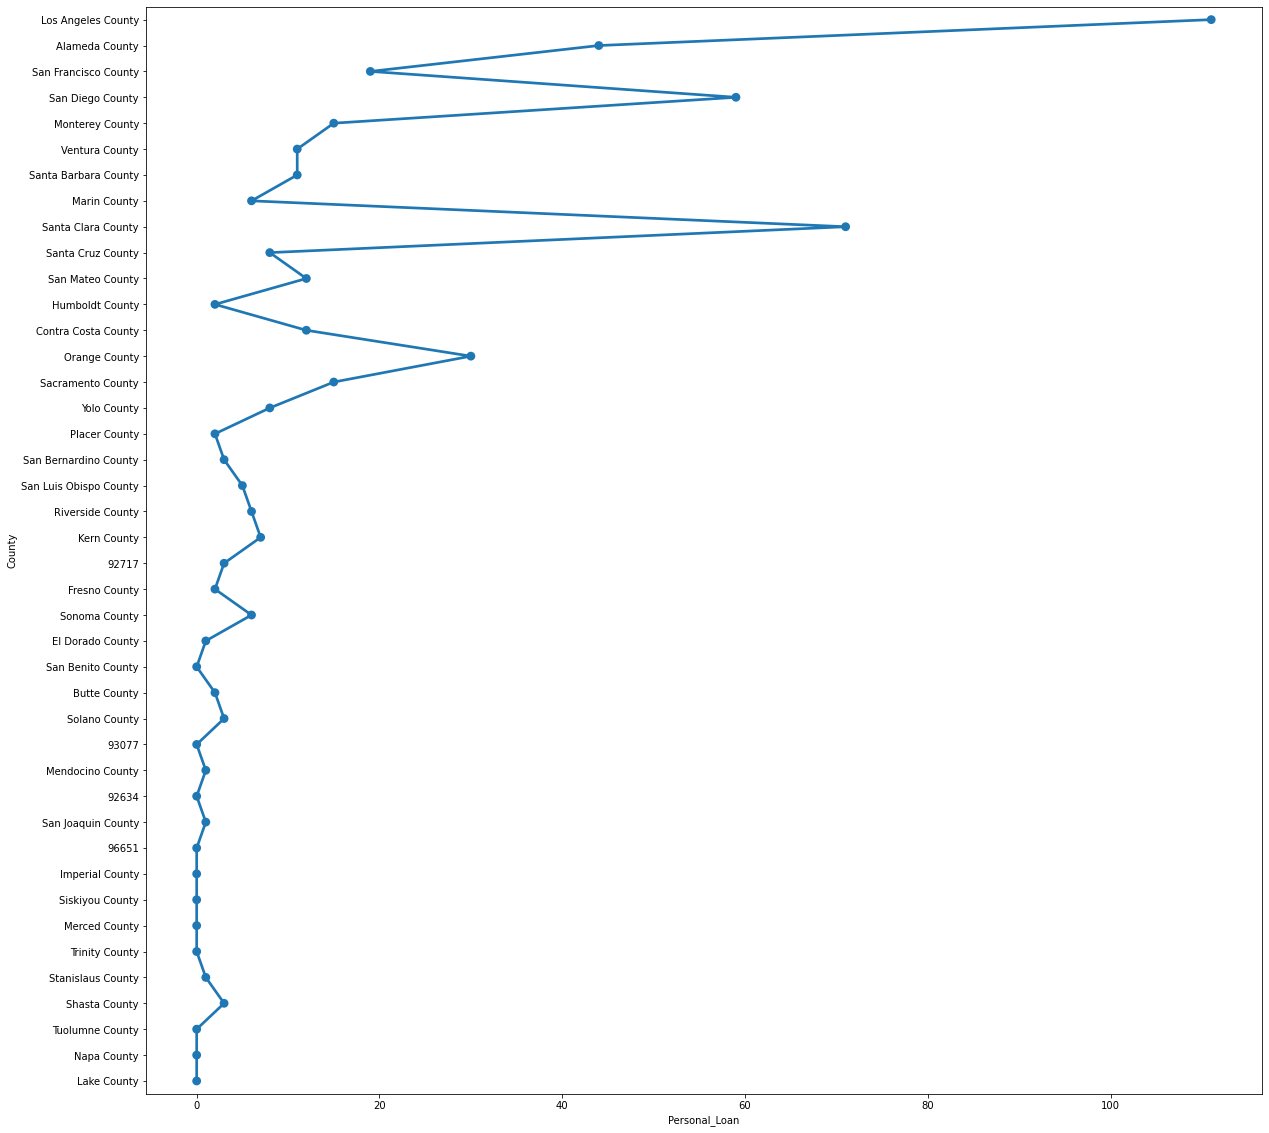

<IPython.core.display.Javascript object>

In [54]:
plt.rc("figure", figsize=[20, 20])

sns.pointplot(y="County", x="Personal_Loan", data=data, estimator=sum, ci=None)

- Los Angeles county has the most customers accept the personal loan offered.

## Personal_Loan with Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


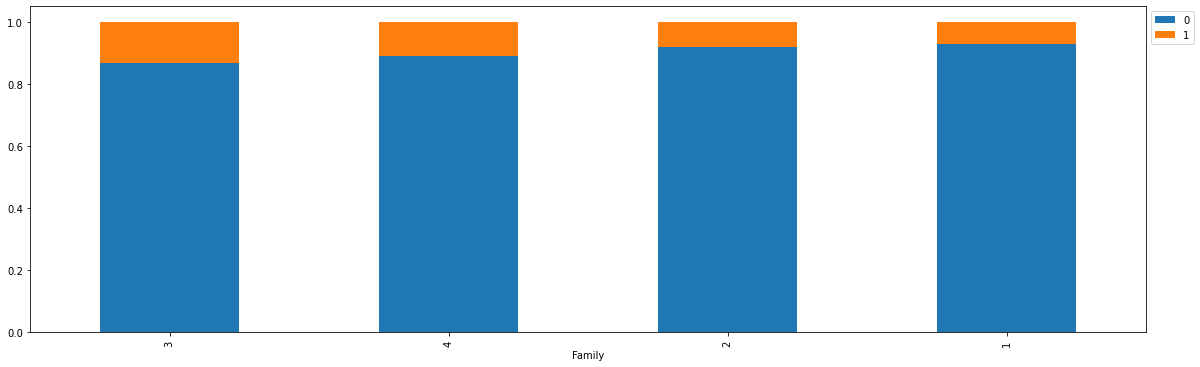

<IPython.core.display.Javascript object>

In [55]:
stacked_barplot(data, "Family", "Personal_Loan")

<AxesSubplot:xlabel='Personal_Loan', ylabel='Family'>

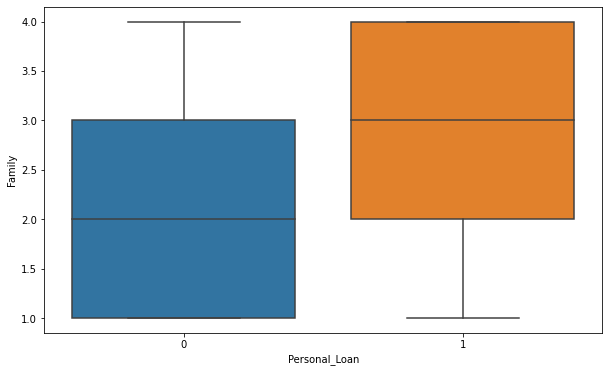

<IPython.core.display.Javascript object>

In [56]:
plt.rc("figure", figsize=[10, 6])
sns.boxplot(data=data, x="Personal_Loan", y="Family")

- Family size of 3 and 4 accept the personal loan offered the most, while family size of 1 and 2 accept the personal loan the least.

## Personal_Loan with CCAvg

Personal_Loan     0    1   All
CCAvg                         
All            4520  480  5000
3.0              34   19    53
4.1               9   13    22
3.4              26   13    39
3.1               8   12    20
4.2               0   11    11
5.4               8   10    18
6.5               8   10    18
3.8              33   10    43
3.6              17   10    27
3.3              35   10    45
5.0               9    9    18
3.9              18    9    27
2.9              45    9    54
2.6              79    8    87
6.0              18    8    26
4.4               9    8    17
4.3              18    8    26
0.2             196    8   204
0.5             155    8   163
4.7              17    7    24
5.2               9    7    16
1.3             121    7   128
2.7              51    7    58
3.7              18    7    25
1.1              77    7    84
5.6               0    7     7
4.0              26    7    33
2.2             123    7   130
4.8               0    7     7
5.1     

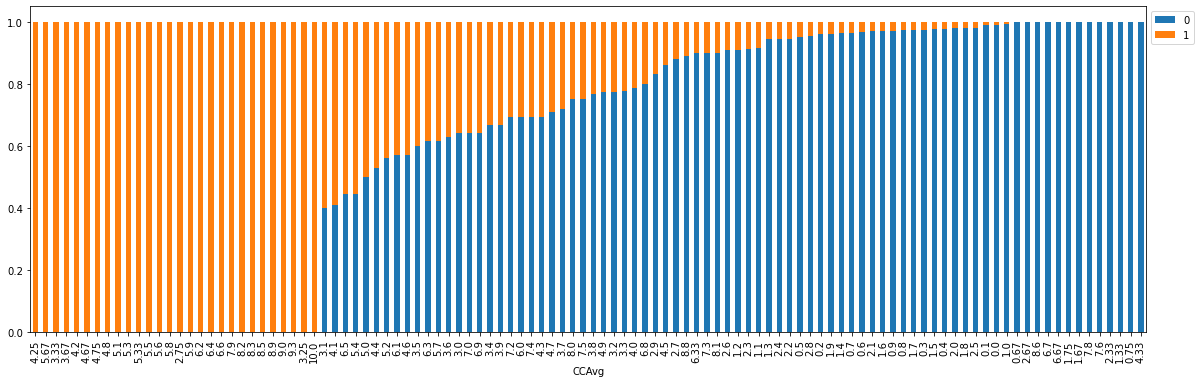

<IPython.core.display.Javascript object>

In [57]:
stacked_barplot(data, "CCAvg", "Personal_Loan")

<AxesSubplot:xlabel='CCAvg', ylabel='Personal_Loan'>

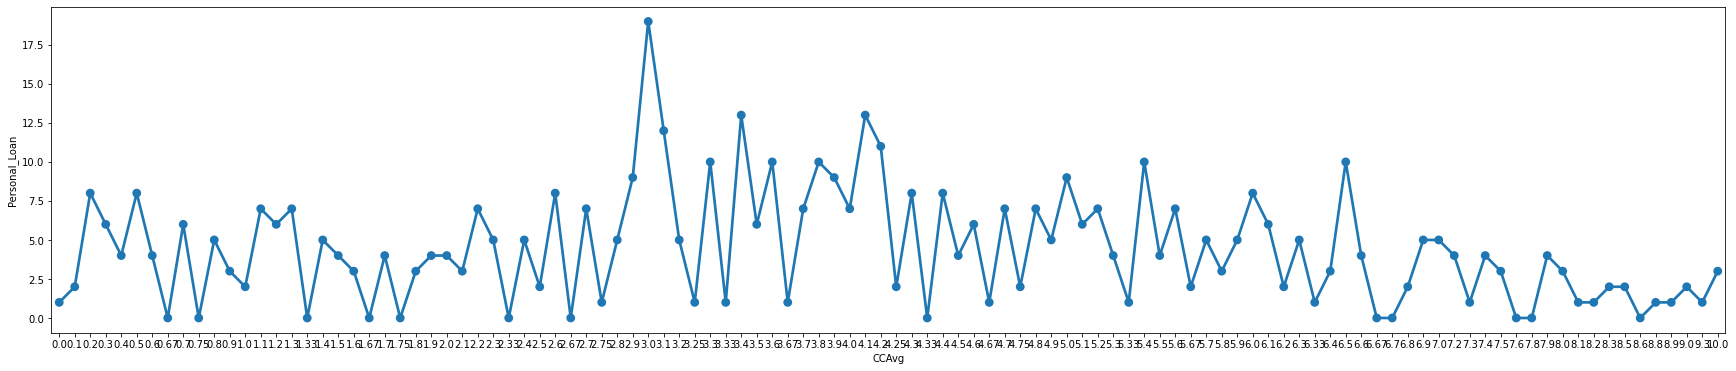

<IPython.core.display.Javascript object>

In [58]:
plt.rc("figure", figsize=[30, 6])
sns.pointplot(x="CCAvg", y="Personal_Loan", data=data, estimator=sum, ci=None)

<AxesSubplot:xlabel='Personal_Loan', ylabel='CCAvg'>

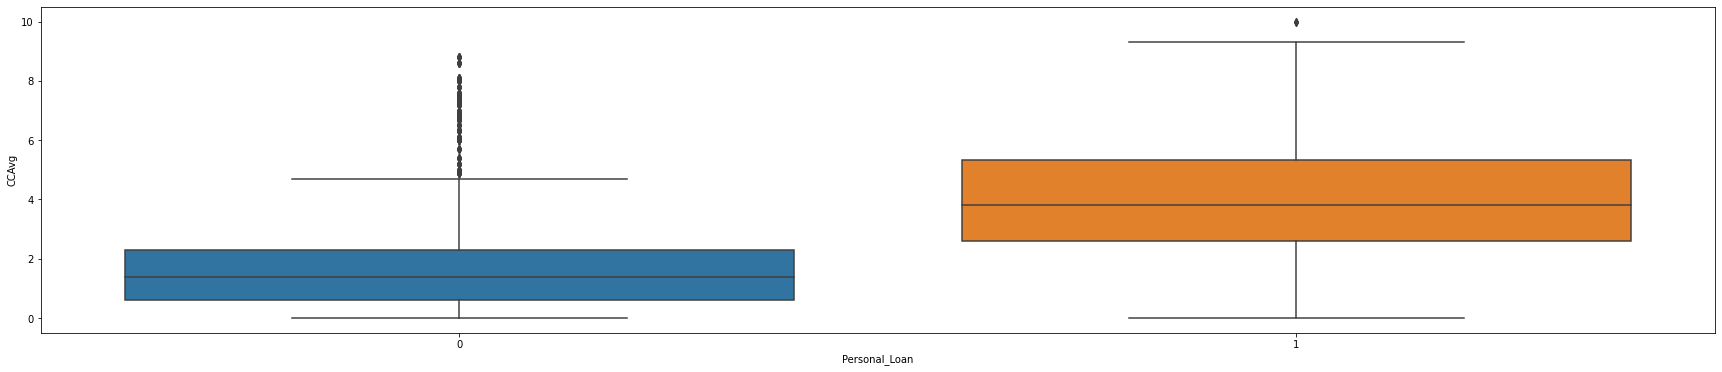

<IPython.core.display.Javascript object>

In [59]:
sns.boxplot(data=data, x="Personal_Loan", y="CCAvg")

- The more customers spend on credit card, the less likely they accept personal loan offered.
- Customers that spend on 3000 dollars per month likely to accept the personal loan offered.

## Personal_Loan with Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


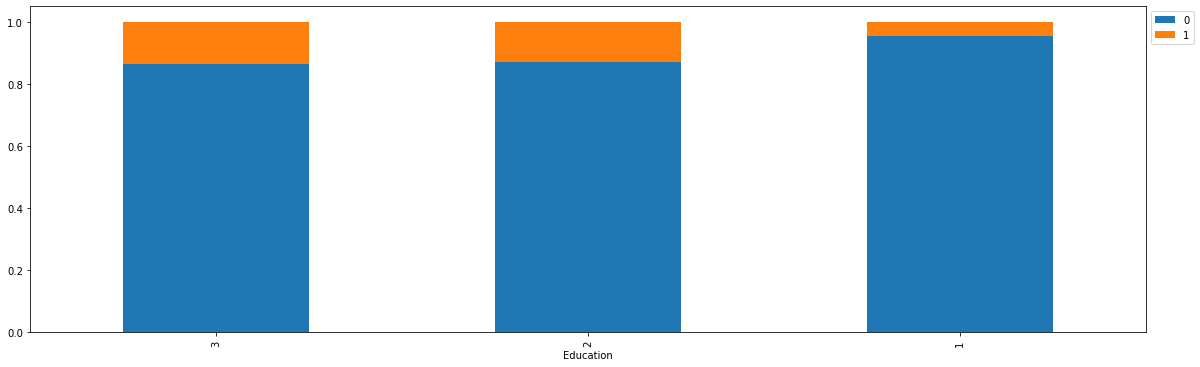

<IPython.core.display.Javascript object>

In [60]:
stacked_barplot(data, "Education", "Personal_Loan")

- The customers that have advanced education likely to accept the personal loan the most, while the undergraduates accept the personal loan the least.

## Personal_Loan with Mortgage

Personal_Loan     0    1   All
Mortgage                      
All            4520  480  5000
0              3150  312  3462
301               0    5     5
342               1    3     4
282               0    3     3
...             ...  ...   ...
276               2    0     2
156               5    0     5
278               1    0     1
280               2    0     2
248               3    0     3

[348 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


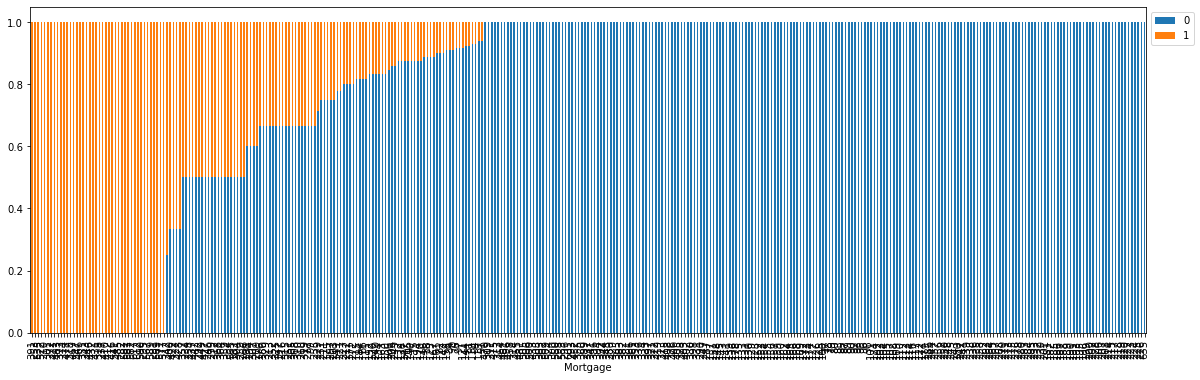

<IPython.core.display.Javascript object>

In [61]:
stacked_barplot(data, "Mortgage", "Personal_Loan")

<AxesSubplot:xlabel='Personal_Loan', ylabel='Mortgage'>

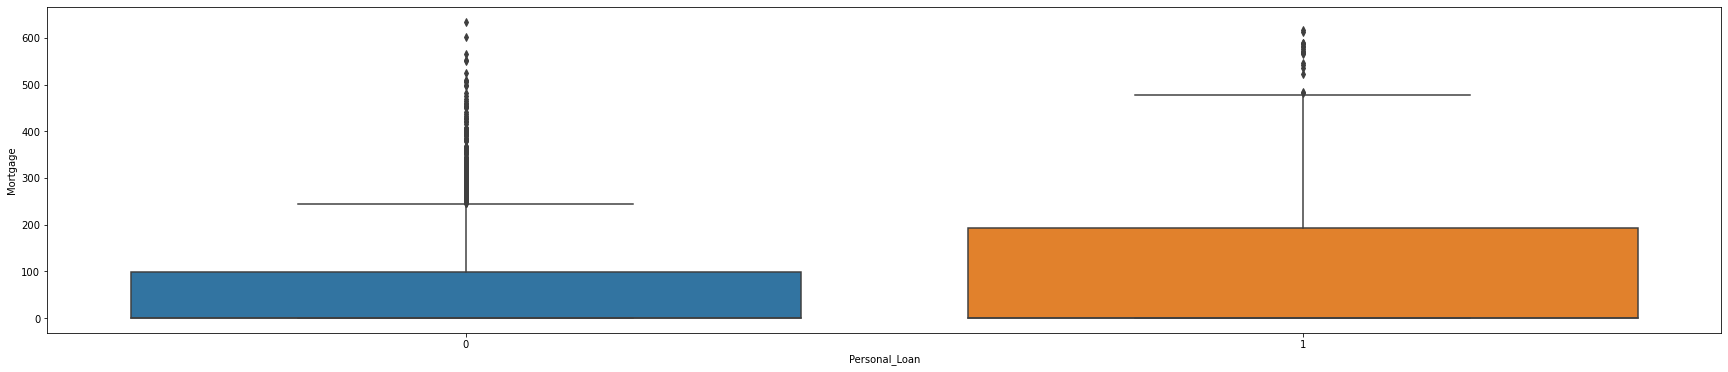

<IPython.core.display.Javascript object>

In [62]:
sns.boxplot(data=data, x="Personal_Loan", y="Mortgage")

- The correlation is not much between Personal_Loan and Mortgage. Hence, there is not much insight.

## Personal_Loan with Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


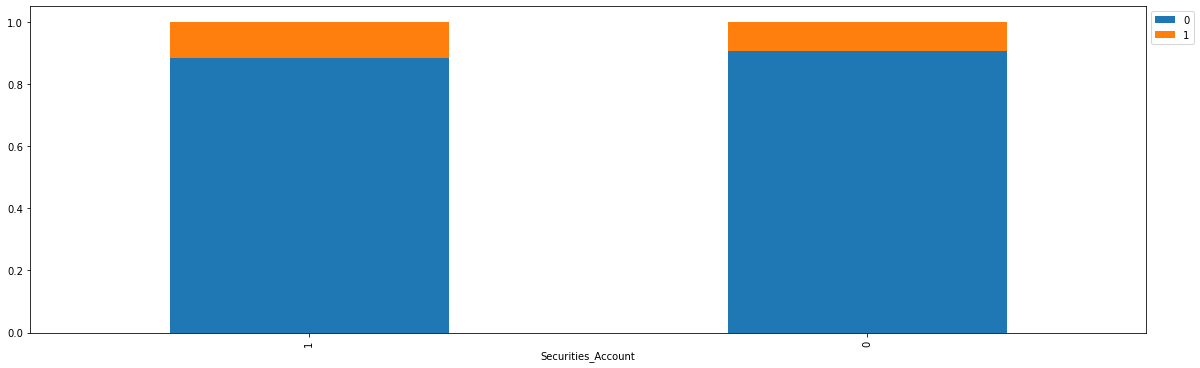

<IPython.core.display.Javascript object>

In [63]:
stacked_barplot(data, "Securities_Account", "Personal_Loan")

- The customers that don't have sercurities account accept the personal loan offered the most, compared to the customers that have sercurities account.

## Personal_Loan with CD_Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


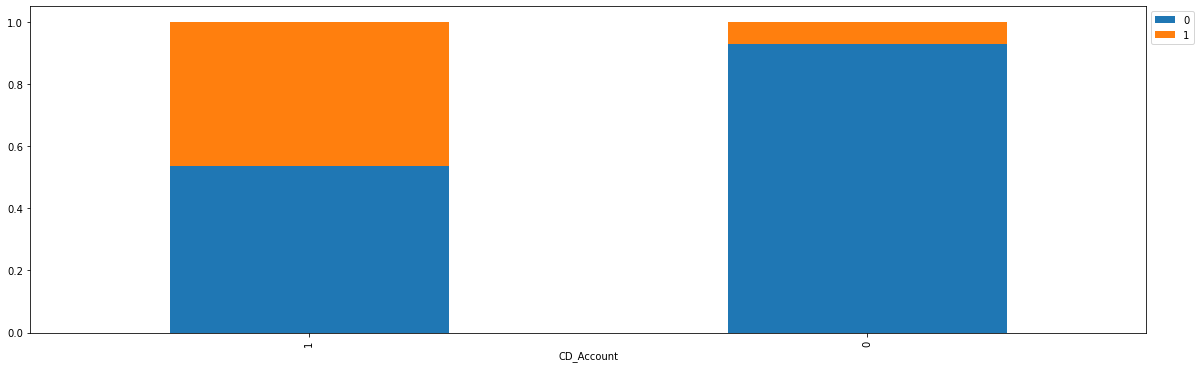

<IPython.core.display.Javascript object>

In [64]:
stacked_barplot(data, "CD_Account", "Personal_Loan")

- The customers don't have CD account with the bank likely the accept the personal loan the most, compared to the ones that have CD account.

## Personal_Loan with Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


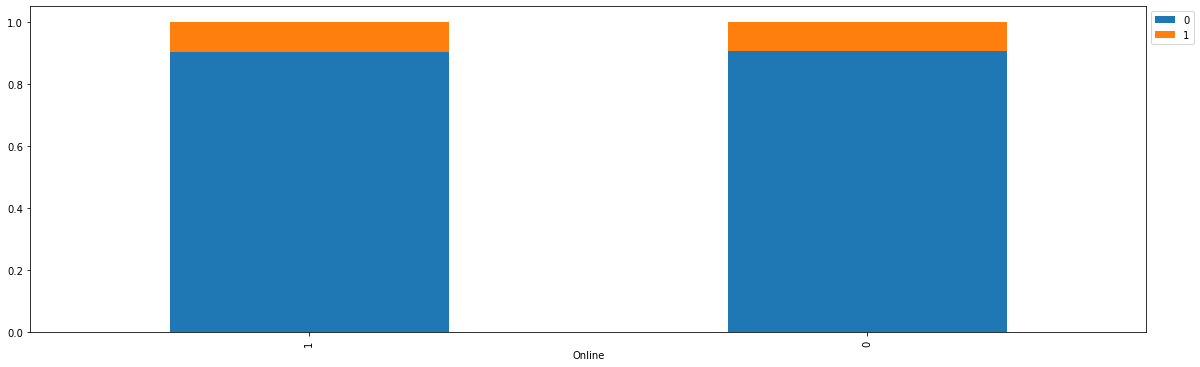

<IPython.core.display.Javascript object>

In [65]:
stacked_barplot(data, "Online", "Personal_Loan")

- Customers that have internet banking facilities likely to accept the personal loan offered, compared to the customers that don't have.

## Personal_Loan with CreditCard

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


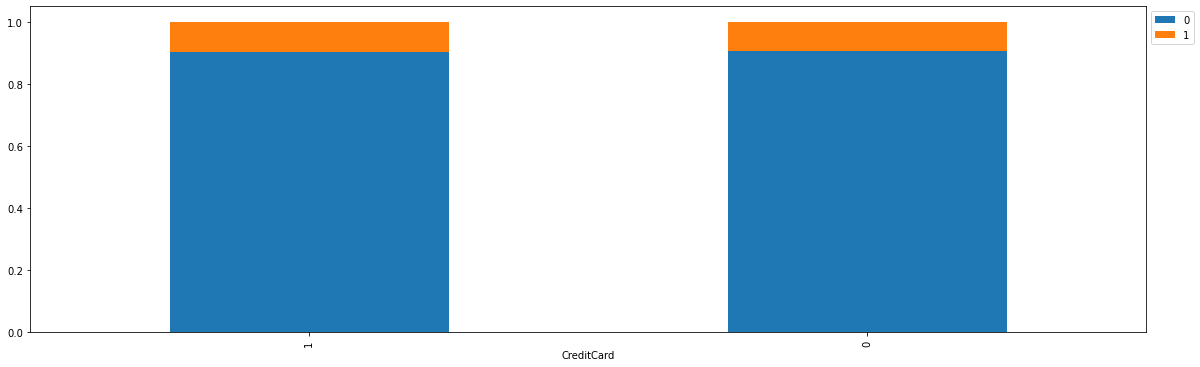

<IPython.core.display.Javascript object>

In [66]:
stacked_barplot(data, "CreditCard", "Personal_Loan")

- Customers that don't use credit card issued by other bank likely to accept the personal loan offered, compared to the customers that use.

## Summary of EDA

**Data Description:**
- There are 5000 rows and 13 columns in the dataset.
- ID column is removed and use the default one.
- New variable County is created. There are some zipcodes that package cannot find the county. Hence, we keep zipcode as it is.
- ZIPCode variable is removed from the dataset.
- The target variable Personal_Loan has integer type.
- Most of the columns in the dataset are integer, except CCAvg column is float.
- There are no duplicate values in the dataset.
- There are no missing values in the dataset.

**Univariate Data Analysis:**
- `Age`: There are no outliers in Age variable. The distribution is unskewed.
- `Experience`: There are no outliers in Experience variable. The distribution is unskewed.
- `Income`: There are outliers, and the distribution is right skewed.
- `County`: Most customers live in Los Angeles county, about 1095 people wiht 21.9%, and the second popular county is San Diego, which is about 568 people with 11.36%.
- `Family`: There are no outliers in Family variable.
- `CCAvg`: There are outliers, and the distribution is right skewed.
- `Education`: There are no outliers in the Education variable.
- `Mortgage`: There are outliers, and the distribution is right skewed.
- `Personal_Loan`: There are bout 4520 customers, which is 90.4% that do not accept the personal loan offered during the last campaign. Only 480 customers do.
- `Securities_Account`: There are 4478 customers, which is 89.56% that do not have securities account with the bank, while 522 customers do.
- `CD_Account`: There are 4698 customers, which is 93.96% that don't have CD account, while 302 customers have.
- `Online`: There are 2984 customers have online banking account, which is 59.68%, while 2016 customers do not have.
- `CreditCard`: There are 3530 customers, which is 70.6% that don't have credit card, while 1470 customers have.

**Bivariate Data Analysis:**
- Customers with older than 25 years and less than 66 years old likely to accept the personal loan offered in the last campaign.
- As the professional experience of years increase, the less likely customers accept the personal loan offered.
- As the income increases, the more customers accept the personal loan offered.
- Family size of 3 and 4 accept the personal loan offered the most, while family size of 1 and 2 accept the personal loan the least.
- The more customers spend on credit card, the less likely they accept personal loan offered.
- The customers that have advanced education likely to accept the personal loan the most, while the undergraduates accept the personal loan the least.
- The customers that don't have sercurities account accept the personal loan offered the most, compared to the customers that have sercurities account.
- The customers don't have CD account with the bank likely the accept the personal loan the most, compared to the ones that have CD account.
- Customers that have internet banking facilities likely to accept the personal loan offered, compared to the customers that don't have.
- Customers that don't use credit card issued by other bank likely to accept the personal loan offered, compared to the customers that use.
- Los Angeles county has the most customers accept the personal loan offered.

# Data Pre-Processing

- We are going to do some treatments for outliers, and fix Experience variable.
- There are no missing values in the dataset.

## Outlier Treatment

- Based on the visualizations, there are variables that have outliers:
    - Income
    - CCAvg
    - Mortgage
- We are going to investigate these variables and do some treatments.
- First, we will find out how many outliers in each variable by using Z-score.For z-score, any points that fall outside 3 standard deviations is an outlier.

In [67]:
outlier = []


def find_z_score(data, feature, threshold=3):
    """
    Description:
    This is a function to detect number of outliers.

    Inputs:
    data - the dataset
    feature - column name
    threshold - value is 3 because any points that fall outside 3 standard deviation is an outlier

    Output:
    Number of outliers in a variables
    """

    mean = np.mean(data[feature])
    std = np.std(data[feature])

    for value in data[feature]:
        z_score = (value - mean) / std
        # use absolute on z score to have more accurate result
        if np.abs(z_score) > threshold:
            outlier.append(value)
    return outlier

<IPython.core.display.Javascript object>

In [68]:
target_columns = ["Income", "CCAvg", "Mortgage"]

<IPython.core.display.Javascript object>

In [69]:
# Detect number of outliers for target variables:
for column in target_columns:
    outliers = find_z_score(data, column)
    print("There are ", len(outliers), " outliers in ", column, " variable")
    print("-" * 20)

There are  2  outliers in  Income  variable
--------------------
There are  123  outliers in  CCAvg  variable
--------------------
There are  228  outliers in  Mortgage  variable
--------------------


<IPython.core.display.Javascript object>

- As we can see, Mortgage variable has the most variable, while Income variable has the least.
- We can use Interquartile range (IQR) method to do outlier treatment.

In [70]:
def IQR_method(data, feature):
    '''
    Description:
    - This is a function that uses Interquartile range (IQR) method to do outlier treatment. 
    - Q1 is known as 25th percentile. Q3 is known as 75th percentile. IQR= Q3-Q1
    - Any data points that fall outside the minimum (Q1-1.5*IQR) and maximum (Q3+1.5*IQR) are outliers.
    - Hence, the data points that are less than the minimum, will be replaced with the minimum values.
    - Data points that are greater than the maximum values, will be replaced with the maximum values.
    
    Inputs:
    data - the dataset
    feature - column name
    
    Output:
    Updated values for outliers
    '''
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3-Q1
    lower_range = Q1 - 1.5*IQR
    upper_range = Q3 + 1.5*IQR
    
    #replace outliers with lower range values and upper range values:
    data[feature] = np.where(data[feature] < lower_range, lower_range, data[feature])
    data[feature] = np.where(data[feature] > upper_range, upper_range, data[feature])


<IPython.core.display.Javascript object>

In [71]:
# Outlier treatment for target variables:
for column in target_columns:
    IQR_method(data, column)

<IPython.core.display.Javascript object>

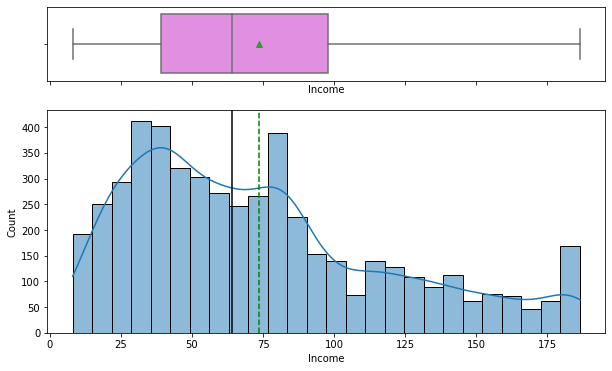

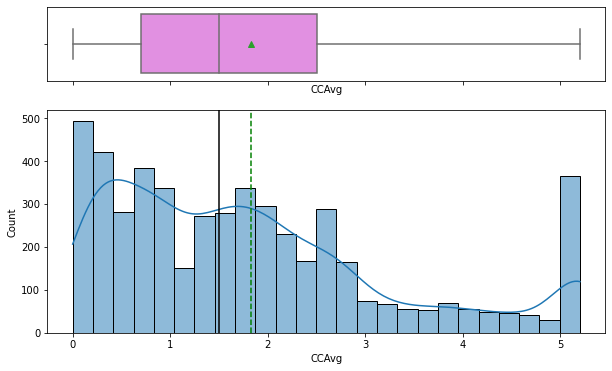

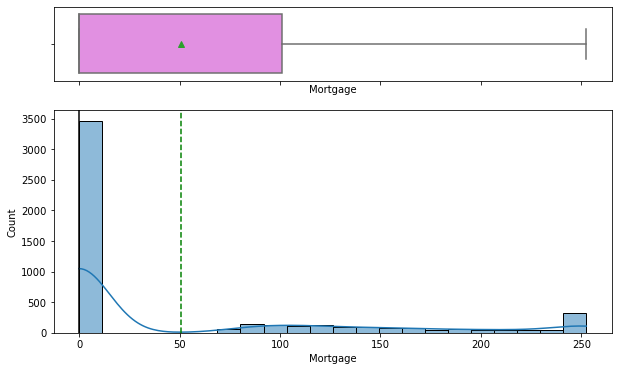

<IPython.core.display.Javascript object>

In [72]:
# Do the plots for target variables to see if the method improves the outliers:
for column in target_columns:
    generate_plot(data, column)
    plt.show()

- Outliers are now treated with IQR method. We can proceed to the next step.

## Fix Experience variable

- Based on the observation above, there are number of professional experience years with -3, -2 and -1. This is a mistake since the least of number of professional experience year is 0.
- First, we are going to take a look at data that has experience less than 0.

In [73]:
data[data["Experience"] < 0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County
89,25,-1,113.0,4,2.30,3,0.0,0,0,0,0,1,San Mateo County
226,24,-1,39.0,2,1.70,2,0.0,0,0,0,0,0,Santa Clara County
315,24,-2,51.0,3,0.30,3,0.0,0,0,0,1,0,Orange County
451,28,-2,48.0,2,1.75,3,89.0,0,0,0,1,0,San Francisco County
524,24,-1,75.0,4,0.20,1,0.0,0,0,0,1,0,Santa Barbara County
536,25,-1,43.0,3,2.40,2,176.0,0,0,0,1,0,San Diego County
540,25,-1,109.0,4,2.30,3,252.5,0,0,0,1,0,San Mateo County
576,25,-1,48.0,3,0.30,3,0.0,0,0,0,0,1,Orange County
583,24,-1,38.0,2,1.70,2,0.0,0,0,0,1,0,San Benito County
597,24,-2,125.0,2,5.20,1,0.0,0,1,0,0,1,Orange County


<IPython.core.display.Javascript object>

- As we can see, the experience less than 0 is a mistake since the income is greater than 0. Hence, we cannot replace these negative values with 0 because if experience is 0, the annual income would not be too high.
- Alternatively, we can fill the negative values with the median.

In [74]:
data["Experience"] = np.where(
    data["Experience"] < 0, data["Experience"].median(), data["Experience"]
)

<IPython.core.display.Javascript object>

- The negative values are now replaced with the median. We can check to see if there are still negative values.

In [75]:
data[data["Experience"] < 0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County


<IPython.core.display.Javascript object>

In [76]:
data["Personal_Loan"].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

<IPython.core.display.Javascript object>

## Summary of Data Pre-Processing

**Outlier Treatment**
- The variables that have outliers are Income, CCAvg, and Mortgage. After using Z-score to count the number of outliers in each variable, IQR method is applied to treat the outliers.

**Fix Experience variable**
- There are negative values in Experience variable, which are -3, -2, and -1. This might be a mistake in the dataset, since the least number of professional experience year is 0.
- After carefully observing data, the negative values are replace with the median of the variable.

# Model building - Logistic Regression

## Define dependent variable

In [77]:
# Personal_Loan is target variable, also a dependent variable
X = data.drop(["Personal_Loan"], axis=1)
y = data["Personal_Loan"]

<IPython.core.display.Javascript object>

In [78]:
y.value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

<IPython.core.display.Javascript object>

## Create dummy variables

- We are going to turn County variable into one-hot coding.

In [79]:
X = pd.get_dummies(
    X,
    columns=["County"],
    drop_first=True,
)

<IPython.core.display.Javascript object>

In [80]:
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,County_92717,County_93077,County_96651,County_Alameda County,County_Butte County,County_Contra Costa County,County_El Dorado County,County_Fresno County,County_Humboldt County,County_Imperial County,County_Kern County,County_Lake County,County_Los Angeles County,County_Marin County,County_Mendocino County,County_Merced County,County_Monterey County,County_Napa County,County_Orange County,County_Placer County,County_Riverside County,County_Sacramento County,County_San Benito County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Joaquin County,County_San Luis Obispo County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Ventura County,County_Yolo County
0,25,1.0,49.0,4,1.6,1,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,45,19.0,34.0,3,1.5,1,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,39,15.0,11.0,1,1.0,1,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35,9.0,100.0,1,2.7,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,35,8.0,45.0,4,1.0,2,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

## Split the data into train and test

In [81]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [82]:
x_train.shape

(3500, 52)

<IPython.core.display.Javascript object>

In [83]:
x_test.shape

(1500, 52)

<IPython.core.display.Javascript object>

- We split the data into 70:30 ratio, with the random_state = 1.
- Train dataset has 3500 rows, and test dataset has 1500 rows.

## Logistic Regression Model

In [84]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

logistic_regression = LogisticRegression(solver="newton-cg", random_state=1)
logistic_regression.fit(x_train, y_train)

LogisticRegression(random_state=1, solver='newton-cg')

<IPython.core.display.Javascript object>

## Finding the coefficients

In [85]:
pd.DataFrame(logistic_regression.coef_[0], x_train.columns, columns=["Coefficients"])

,Coefficients
Age,0.062762
Experience,-0.056574
Income,0.055665
Family,0.780346
CCAvg,0.387583
Education,1.740822
Mortgage,0.001127
Securities_Account,-0.821316
CD_Account,3.218479
Online,-0.567922


<IPython.core.display.Javascript object>

## Coefficient Interpretations

- Coefficients of Age, Income, Mortgage, Securities_Account, Online, CreditCard and some of County columns are positive. This indicates as these columns increase, the target/dependent variable Personal_Loan will also increase, which means higher chances for customers to accept the personal loan offered.


- Coefficients of Experience, Family, CCAvg, Education, CD_Account, and some of County columns are negative. Increase on these columns will lead to decrease of target variable Personal_Loan. This means higher chances that customers will not accept the personal loan offered.

## Converting coefficients to odds

- Coefficients of Logistic Regression model are log(odds) (coefficient = log(odds)). Hence, we will need to convert to odds. 
- Odds (odds of success) is the probability of success over probability of failure. 
- For odd results:
    - If odd = 1 -> no association
    - If odd > 1 -> positive association, meaning have higher odds of the outcome.
    - If odd < 1 -> negative association, meaning have lower odds of the outcome.
    
    
- Odd calculation:  odds_convert = exp(coefficient)
- The percentage change in odds calculation: odds_percentage = (exp(coefficient) - 1) * 100

In [86]:
# Convert the coefficients of log to odds:
odds = np.exp(logistic_regression.coef_[0])
odds

array([ 1.06477362,  0.94499699,  1.05724391,  2.18222814,  1.47341502,
        5.70202788,  1.00112788,  0.43985242, 24.99008259,  0.56670176,
        0.38202004,  1.77426544,  0.99804074,  0.99936623,  0.87025802,
        0.77422898,  1.90516269,  0.85701573,  0.97297312,  0.72450311,
        0.98745977,  1.65279084,  0.99605085,  0.99363243,  1.49979118,
        0.95275873,  0.79406606,  0.93409036,  0.99518643,  0.79538411,
        1.90541327,  2.72913369,  1.06119417,  0.76385785,  0.40892707,
        1.01530938,  1.32290102,  1.00933944,  0.64917727,  0.37489134,
        1.0807368 ,  1.15780508,  1.15593237,  0.81974222,  0.97763631,
        1.2257652 ,  1.57349319,  0.7635519 ,  0.90904993,  0.86671999,
        1.14865162,  0.61526558])

<IPython.core.display.Javascript object>

In [87]:
# Find the percentage change in odds:
odds_percent = (odds - 1) * 100
odds_percent

array([ 6.47736213e+00, -5.50030102e+00,  5.72439054e+00,  1.18222814e+02,
        4.73415015e+01,  4.70202788e+02,  1.12787683e-01, -5.60147575e+01,
        2.39900826e+03, -4.33298237e+01, -6.17979957e+01,  7.74265437e+01,
       -1.95925877e-01, -6.33771625e-02, -1.29741978e+01, -2.25771019e+01,
        9.05162689e+01, -1.42984275e+01, -2.70268791e+00, -2.75496886e+01,
       -1.25402260e+00,  6.52790838e+01, -3.94915384e-01, -6.36757146e-01,
        4.99791179e+01, -4.72412682e+00, -2.05933941e+01, -6.59096405e+00,
       -4.81357285e-01, -2.04615886e+01,  9.05413270e+01,  1.72913369e+02,
        6.11941658e+00, -2.36142149e+01, -5.91072929e+01,  1.53093787e+00,
        3.22901019e+01,  9.33943718e-01, -3.50822728e+01, -6.25108663e+01,
        8.07368002e+00,  1.57805076e+01,  1.55932374e+01, -1.80257784e+01,
       -2.23636868e+00,  2.25765198e+01,  5.73493194e+01, -2.36448096e+01,
       -9.09500700e+00, -1.33280015e+01,  1.48651619e+01, -3.84734418e+01])

<IPython.core.display.Javascript object>

In [88]:
# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# Create a dataframe:
pd.DataFrame(
    {"Odds": odds, "Odds_Percent_Change": odds_percent}, index=x_train.columns
).T

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,County_92717,County_93077,County_96651,County_Alameda County,County_Butte County,County_Contra Costa County,County_El Dorado County,County_Fresno County,County_Humboldt County,County_Imperial County,County_Kern County,County_Lake County,County_Los Angeles County,County_Marin County,County_Mendocino County,County_Merced County,County_Monterey County,County_Napa County,County_Orange County,County_Placer County,County_Riverside County,County_Sacramento County,County_San Benito County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Joaquin County,County_San Luis Obispo County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Ventura County,County_Yolo County
Odds,1.064774,0.944997,1.057244,2.182228,1.473415,5.702028,1.001128,0.439852,24.990083,0.566702,0.382020,1.774265,0.998041,0.999366,0.870258,0.774229,1.905163,0.857016,0.972973,0.724503,0.987460,1.652791,0.996051,0.993632,1.499791,0.952759,0.794066,0.934090,0.995186,0.795384,1.905413,2.729134,1.061194,0.763858,0.408927,1.015309,1.322901,1.009339,0.649177,0.374891,1.080737,1.157805,1.155932,0.819742,0.977636,1.225765,1.573493,0.763552,0.909050,0.866720,1.148652,0.615266
Odds_Percent_Change,6.477362,-5.500301,5.724391,118.222814,47.341502,470.202788,0.112788,-56.014758,2399.008259,-43.329824,-61.797996,77.426544,-0.195926,-0.063377,-12.974198,-22.577102,90.516269,-14.298427,-2.702688,-27.549689,-1.254023,65.279084,-0.394915,-0.636757,49.979118,-4.724127,-20.593394,-6.590964,-0.481357,-20.461589,90.541327,172.913369,6.119417,-23.614215,-59.107293,1.530938,32.290102,0.933944,-35.082273,-62.510866,8.073680,15.780508,15.593237,-18.025778,-2.236369,22.576520,57.349319,-23.644810,-9.095007,-13.328001,14.865162,-38.473442


<IPython.core.display.Javascript object>

## Coefficient interpretations

- `Age`:  Holding all other features constant, a unit change in Age will increase the odds of a customer accept the personal loan offer by 1.113 times or a 11.325% increase in the odds.
- `Experience`: Assume all other features are constant, a unit change in Experience will decrease the odds of a customer buying the personal loan by 0.924 times or a 7.593% decrease in the odds.
- `Income`: Holding all other features constant, a unit change in Income will increase the odds of a customer buying the personal loan by 1.01 times or a 0.667% increase in the odds.
- `Family`: Assume all other features are constant, a unit change in Family will decrease the odds of a customer accept the personal loan offer by 0.611 times or a 38.869% decrease in the odds.
- `CCAvg`: Holding all other features constant, a unit change in CCAvg will decrease the odds of a customer buying the personal loan by 0.739 times or a 26.146% decrease in the odds.
- `Education`: Holding all other features constant, a unit change in Education will decrease the odds of a customer buying the personal loan by 0.365 times or a 63.494% decrease in the odds.
- `Mortgage`: Holding all other features constant, a unit change in Mortgage will increase the odds of a customer buying the personal loan by 1.00 times or a 0.13% increase in the odds.
- `Securities_Account`: Holding all other features constant, a unit change in Securities_Account will increase the odds of a customer buying the personal loan by 1.482 times or a 48.226% in the odds.
- `CD_Account`: Holding all other features constant, a unit change in CD_Account will decrease the odds of a customer buying the personal loan by 0.156 times or 84.356% in the odds.
- `Online`: Holding all other features constant, a unit change in Online will increase the odds of a customer buying the personal loan by 1.233 times or 23.256% in the odds.
- `CreditCard`: Holding all other features constant, a unit change in CreditCard will increase the odds of a customer buying the personal loan by 1.538 times or 53.785% in the odds.

`Above are coefficient explanations for some columns. Interpretation for other columns can be done similarly.`

## Check model performances

In [89]:
# Create confusion matrix with heatmap
def create_confusion_matrix(model, predictor, target, threshold=0.5):
    """
    Description:
    This is the function to create confusion matrix and heatmap

    Inputs:
    model: classifier
    predictor - independent variables
    target - dependent variables
    threshold: threshold for classifying the observation as class 1

    Outputs:
    Heatmap plot with confusion matrix values
    """

    # Do the prediction:
    prediction = np.round(
        logistic_regression.predict_proba(predictor)[:, 1] > threshold
    )

    # Confusion matrix:
    logistic_cm = metrics.confusion_matrix(target, prediction, labels=[1, 0])

    df_cm = pd.DataFrame(
        logistic_cm,
        index=[i for i in ["Actual 1", " Actual 0"]],
        columns=[i for i in ["Predict 1", "Predict 0"]],
    )
    plt.figure(figsize=(7, 5))
    sns.heatmap(df_cm, annot=True, fmt="g")
    plt.show()

<IPython.core.display.Javascript object>

In [90]:
# Create a function to compute the model metrics:
def logistic_model_performance(model, predictor, target, threshold=0.5):
    """
    Description:
    This is the function to compute the model metrics

    Inputs:
    model: classifier
    predictor - independent variables
    target - dependent variables
    threshold: threshold for classifying the observation as class 1

    Outputs:
    Model metrics
    """
    # Do the prediction:
    prediction = np.round(
        logistic_regression.predict_proba(predictor)[:, 1] > threshold
    )

    # Calculate the accuracy:
    accuracy = accuracy_score(target, prediction)

    # Calculate recall:
    recall = recall_score(target, prediction)

    # Calculate Precision:
    precision = precision_score(target, prediction)

    # Calculate F1 score:
    f1 = f1_score(target, prediction)

    # creating a dataframe of metrics
    metrics_dataframe = pd.DataFrame(
        {
            "Accuracy": accuracy,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return metrics_dataframe

<IPython.core.display.Javascript object>

### Checking model performance on training set

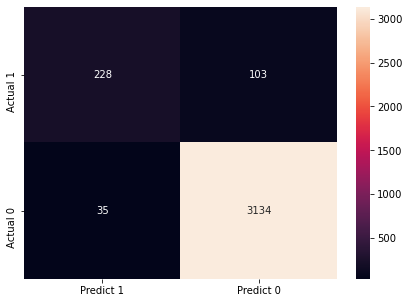

<IPython.core.display.Javascript object>

In [91]:
# Confusion matrix for train dataset:
create_confusion_matrix(logistic_regression, x_train, y_train)

**Confusion matrix interpretation for training dataset**
- True Positives (TP): we correctly predicted that there are 228 customers will buy the personal loan.
- True Negatives (TN): we correctly predicted that there are 3134 customers will not buy the personal loan.
- False Positives (FP): we incorrectly predicted that there are 35 customers will buy the personal loan.This is Type I error.
- False Negatives (FN): we incorrectly predicted that there are 103 customers will not buy the personal loan. This is Type II error.

In [92]:
# Calculate the model metrics for train dataset:
logistic_train_metrics = logistic_model_performance(
    logistic_regression, x_train, y_train
)
logistic_train_metrics

,Accuracy,Recall,Precision,F1
0,0.960571,0.688822,0.86692,0.767677


<IPython.core.display.Javascript object>

- Looking at the model metrics for train dataset:
    - Accuracy is high but it's not always accurate to use.
    - The Recall result is above 0.5. However, the number is relatively low.
    - Precision result is normal.
    - F1 score is above 0.5.
    
- Overall, the model is good, but it needs the improvement.

### Checking model performance on testing set

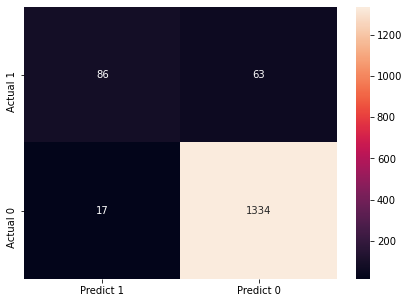

<IPython.core.display.Javascript object>

In [93]:
# Confusion matrix for test dataset:
create_confusion_matrix(logistic_regression, x_test, y_test)

**Confusion matrix interpretation for testing dataset**
- True Positives (TP): we correctly predicted that there are 86 customers will buy the personal loan.
- True Negatives (TN): we correctly predicted that there are 1334 customers will not buy the personal loan.
- False Positives (FP): we incorrectly predicted that there are 17 customers will buy the personal loan.This is Type I error.
- False Negatives (FN): we incorrectly predicted that there are 63 customers will not buy the personal loan. This is Type II error.

In [94]:
# Calculate the model metrics for test dataset:
logistic_test_metrics = logistic_model_performance(logistic_regression, x_test, y_test)
logistic_test_metrics

,Accuracy,Recall,Precision,F1
0,0.946667,0.577181,0.834951,0.68254


<IPython.core.display.Javascript object>

- Looking at the model metrics for test dataset:
    - Accuracy is high but it's not always accurate to use.
    - The Recall result is above 0.5. However, the number is lower than the train dataset.
    - Precision result is normal.
    - F1 score is above 0.5.

- Overall, the model needs some improvements since the Recall is quite low as well as F1 score.

### ROC-AUC Evaluation

- ROC-AUC is a performance measurement to see evaluates of how well the logistic regression model is.
- We are going to apply the evluation on both training and testing dataset.

#### ROC-AUC on training dataset

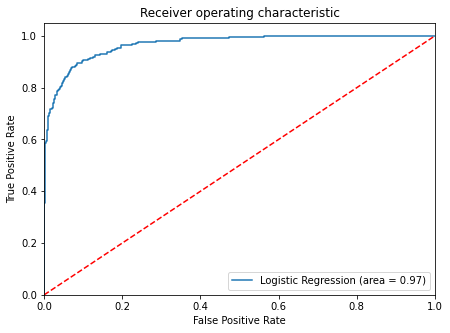

<IPython.core.display.Javascript object>

In [95]:
logit_roc_auc_train = roc_auc_score(
    y_train, logistic_regression.predict_proba(x_train)[:, 1]
)
fpr, tpr, thresholds = roc_curve(
    y_train, logistic_regression.predict_proba(x_train)[:, 1]
)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### ROC-AUC on testing dataset

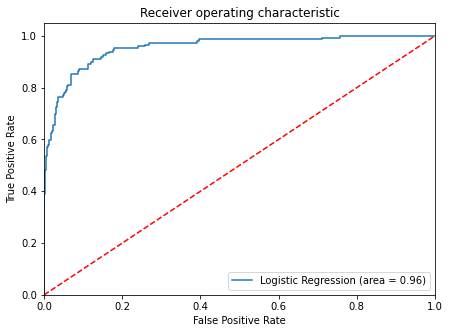

<IPython.core.display.Javascript object>

In [96]:
logit_roc_auc_test = roc_auc_score(
    y_test, logistic_regression.predict_proba(x_test)[:, 1]
)
fpr, tpr, thresholds = roc_curve(
    y_test, logistic_regression.predict_proba(x_test)[:, 1]
)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### ROC-AUC Interpretations on training and testing data

- Overall, the ROC curves on both training and testing data are good.
- The areas under the curves are large. Hence, the performances of both training and testing data are good.
- However, the Recall and F1 scores on both training and testing data are quite low.

## Model Performance Improvement

- Since the Recall and F1 scores on both training and testing data are low, we are going to improve the model by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

- In order to find the optimal threshold, we need to find True Positive Rate (TPR) and False Positive Rare (FPR). The threshold value is selected where the FPR value is low, and the TPR value is high.

In [97]:
fpr, tpr, thresholds = roc_curve(
    y_train, logistic_regression.predict_proba(x_train)[:, 1]
)
optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_threshold_index]
print(optimal_threshold_auc_roc)

0.11717656818045581


<IPython.core.display.Javascript object>

#### Checking model performance on training set

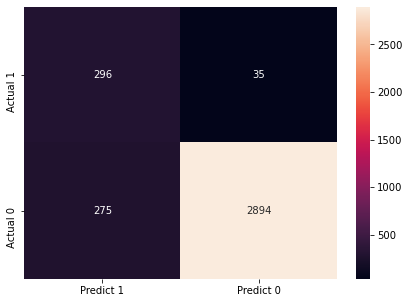

<IPython.core.display.Javascript object>

In [98]:
# Confusion matrix for train dataset:
create_confusion_matrix(
    logistic_regression, x_train, y_train, threshold=optimal_threshold_auc_roc
)

In [99]:
# Calculate the model metrics for train dataset:
logistic_train_metrics_auc_roc = logistic_model_performance(
    logistic_regression, x_train, y_train, threshold=optimal_threshold_auc_roc
)
logistic_train_metrics_auc_roc

,Accuracy,Recall,Precision,F1
0,0.911429,0.89426,0.518389,0.656319


<IPython.core.display.Javascript object>

- Comparing the new model with the first model, the Recall score has improved from 0.689 to 0.894. However, the F1 score has reduced from 0.768 to 0.656.

#### Checking model performance on testing set

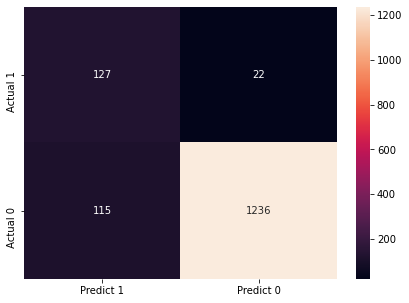

<IPython.core.display.Javascript object>

In [100]:
# Confusion matrix for test dataset:
create_confusion_matrix(
    logistic_regression, x_test, y_test, threshold=optimal_threshold_auc_roc
)

In [101]:
# Calculate the model metrics for test dataset:
logistic_test_metrics_auc_roc = logistic_model_performance(
    logistic_regression, x_test, y_test, threshold=optimal_threshold_auc_roc
)
logistic_test_metrics_auc_roc

,Accuracy,Recall,Precision,F1
0,0.908667,0.852349,0.524793,0.649616


<IPython.core.display.Javascript object>

- Comparing the new model with the first model, the Recall score has improved from 0.577 to 0.852. However, the F1 score has reduced from 0.683 to 0.649.

### Precision-Recall curve

- The optimal threshold using ROC_AUC method improved the Recall scores. However, the F1 scores are reduced. Hence, we are going to try Precision-Recall curve to see if this method can improve the model.

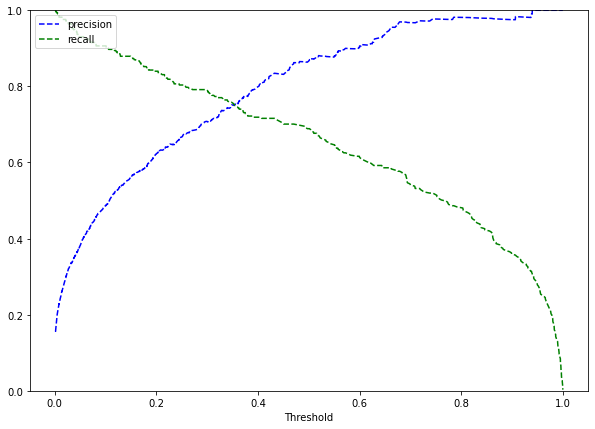

<IPython.core.display.Javascript object>

In [102]:
y_scores = logistic_regression.predict_proba(x_train)[:, 1]
precision, recall, threshold = precision_recall_curve(
    y_train,
    y_scores,
)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(precision, recall, threshold)
plt.show()

- Based on the plot above, the optimal threshold is 0.38

In [103]:
# setting the threshold
optimal_threshold_curve = 0.38

<IPython.core.display.Javascript object>

#### Checking model performance on training set

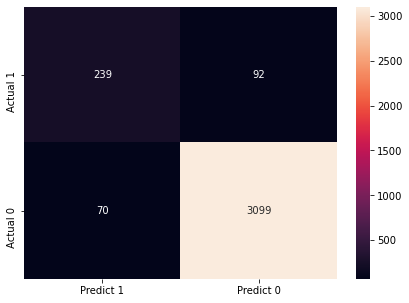

<IPython.core.display.Javascript object>

In [104]:
# Confusion matrix for train dataset:
create_confusion_matrix(
    logistic_regression, x_train, y_train, threshold=optimal_threshold_curve
)

In [105]:
# Calculate the model metrics for train dataset:
logistic_train_metrics_pre_recall = logistic_model_performance(
    logistic_regression, x_train, y_train, threshold=optimal_threshold_curve
)
logistic_train_metrics_pre_recall

,Accuracy,Recall,Precision,F1
0,0.953714,0.722054,0.773463,0.746875


<IPython.core.display.Javascript object>

#### Checking model performance on testing set

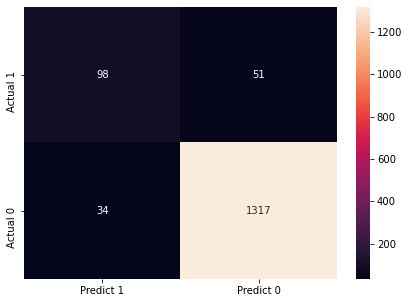

<IPython.core.display.Javascript object>

In [106]:
# Confusion matrix for test dataset:
create_confusion_matrix(
    logistic_regression, x_test, y_test, threshold=optimal_threshold_curve
)

In [107]:
# Calculate the model metrics for test dataset:
logistic_test_metrics_pre_recall = logistic_model_performance(
    logistic_regression, x_test, y_test, threshold=optimal_threshold_curve
)
logistic_test_metrics_pre_recall

,Accuracy,Recall,Precision,F1
0,0.943333,0.657718,0.742424,0.697509


<IPython.core.display.Javascript object>

- Based on the new results, Precision-Recall curve method doesn't improve the model.

## Logistic Regression Model Performance Summary

### Training performance comparison

In [108]:
models_train_comp_df = pd.concat(
    [
        logistic_train_metrics.T,
        logistic_train_metrics_auc_roc.T,
        logistic_train_metrics_pre_recall.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "First Model - Logistic_Regression_Threshold_0.5",
    "Second Model - Logistic_Regression_Threshold_0.117",
    "Third Model - Logistic_Regression_Threshold_0.38",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,First Model - Logistic_Regression_Threshold_0.5,Second Model - Logistic_Regression_Threshold_0.117,Third Model - Logistic_Regression_Threshold_0.38
Accuracy,0.960571,0.911429,0.953714
Recall,0.688822,0.894260,0.722054
Precision,0.866920,0.518389,0.773463
F1,0.767677,0.656319,0.746875


<IPython.core.display.Javascript object>

In [109]:
models_test_comp_df = pd.concat(
    [
        logistic_test_metrics.T,
        logistic_test_metrics_auc_roc.T,
        logistic_test_metrics_pre_recall.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "First Model - Logistic_Regression_Threshold_0.5",
    "Second Model - Logistic_Regression_Threshold_0.117",
    "Third Model - Logistic_Regression_Threshold_0.38",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,First Model - Logistic_Regression_Threshold_0.5,Second Model - Logistic_Regression_Threshold_0.117,Third Model - Logistic_Regression_Threshold_0.38
Accuracy,0.946667,0.908667,0.943333
Recall,0.577181,0.852349,0.657718
Precision,0.834951,0.524793,0.742424
F1,0.682540,0.649616,0.697509


<IPython.core.display.Javascript object>

- Accuracy is a measurement of the model's accuracy. This is not a good measurement because it doesn't take into account of how the data is distributed.
- Recall is sensivity, which is a measurement of how good the model is at detecting the positives. This is the ratio of correctly predicted positives over the total actual positives.
- Precision is the ratio of correctly predicted positives over total positive predictions.
- F1 is an onverall measure of a model's accuracy that combines precision and recall. This is a good measurement because it takes into account of how the data is distributed.

-> Hence, F1 score is used to evaluate the model's performance.


- Based on the results, we can see that F1 score of the first model yields the best result on training set, with a score 0.768 and threshold of 0.5.

# Model building - Decision Tree

- We are now going to apply the Decision Tree technique to the dataset.
- Dictionary {0:0.15,1:0.85} will be used to specify the weight for each class.
- Class_weight is a hyperparameter for the decision tree classifier.
- By default, Gini criteria will be used.

In [110]:
decision_tree_model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

In [111]:
# Create confusion matrix function for Decision Tree model
def DT_confusion_matrix(model, predictor, target):
    """
    Description:
    This is the function to create confusion matrix and heatmap for Decision Tree model

    Inputs:
    model: classifier
    predictor - independent variables
    target - dependent variables

    Outputs:
    Heatmap plot with confusion matrix values
    """
    
    prediction = model.predict(predictor)
    cm = confusion_matrix(target, prediction)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


<IPython.core.display.Javascript object>

In [112]:
# Create a function to calculate the model metrics:
# Create a function to compute the model metrics:
def DT_model_metrics(model, predictor, target):
    """
    Description:
    This is the function to compute the model metrics

    Inputs:
    model: classifier
    predictor - independent variables
    target - dependent variables

    Outputs:
    Model metrics
    """
    # Do the prediction:
    prediction = model.predict(predictor)

    # Calculate the accuracy:
    accuracy = accuracy_score(target, prediction)

    # Calculate recall:
    recall = recall_score(target, prediction)

    # Calculate Precision:
    precision = precision_score(target, prediction)

    # Calculate F1 score:
    f1 = f1_score(target, prediction)

    # creating a dataframe of metrics
    metrics_dataframe = pd.DataFrame(
        {
            "Accuracy": accuracy,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return metrics_dataframe

<IPython.core.display.Javascript object>

### Checking model performance on training set

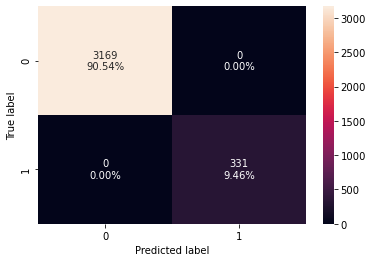

<IPython.core.display.Javascript object>

In [113]:
# apply confusion matrix on train dataset:
DT_confusion_matrix(decision_tree_model, x_train, y_train)

#### Checking model performance on training set

In [114]:
# calculate DT model metrics on train dataset:
DT_train_metrics = DT_model_metrics(decision_tree_model, x_train, y_train)
DT_train_metrics

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

- Based on the results, the metrics for train dataset are 100%.
- The model classified the data perfectly with 0 false positives and false negatives.
- This seems to be overfitting since the tree grows without restrictions.
- We will investigate on the test dataset to see if the results are the same.

#### Checking model performance on test set

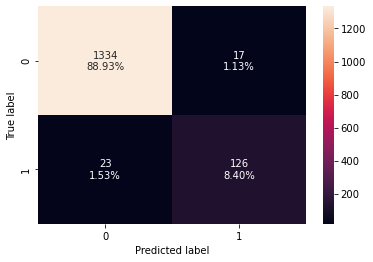

<IPython.core.display.Javascript object>

In [115]:
# apply confusion matrix on test dataset:
DT_confusion_matrix(decision_tree_model, x_test, y_test)

In [116]:
# calculate DT model metrics on test dataset:
DT_test_metrics = DT_model_metrics(decision_tree_model, x_test, y_test)
DT_test_metrics

,Accuracy,Recall,Precision,F1
0,0.973333,0.845638,0.881119,0.863014


<IPython.core.display.Javascript object>

- Based on the results, the metrics for testing set are lower than the training set. This indicates an overfitting on training set.

## Visualizing the Decision Tree

In [117]:
feature_names = x_train.columns.tolist()

<IPython.core.display.Javascript object>

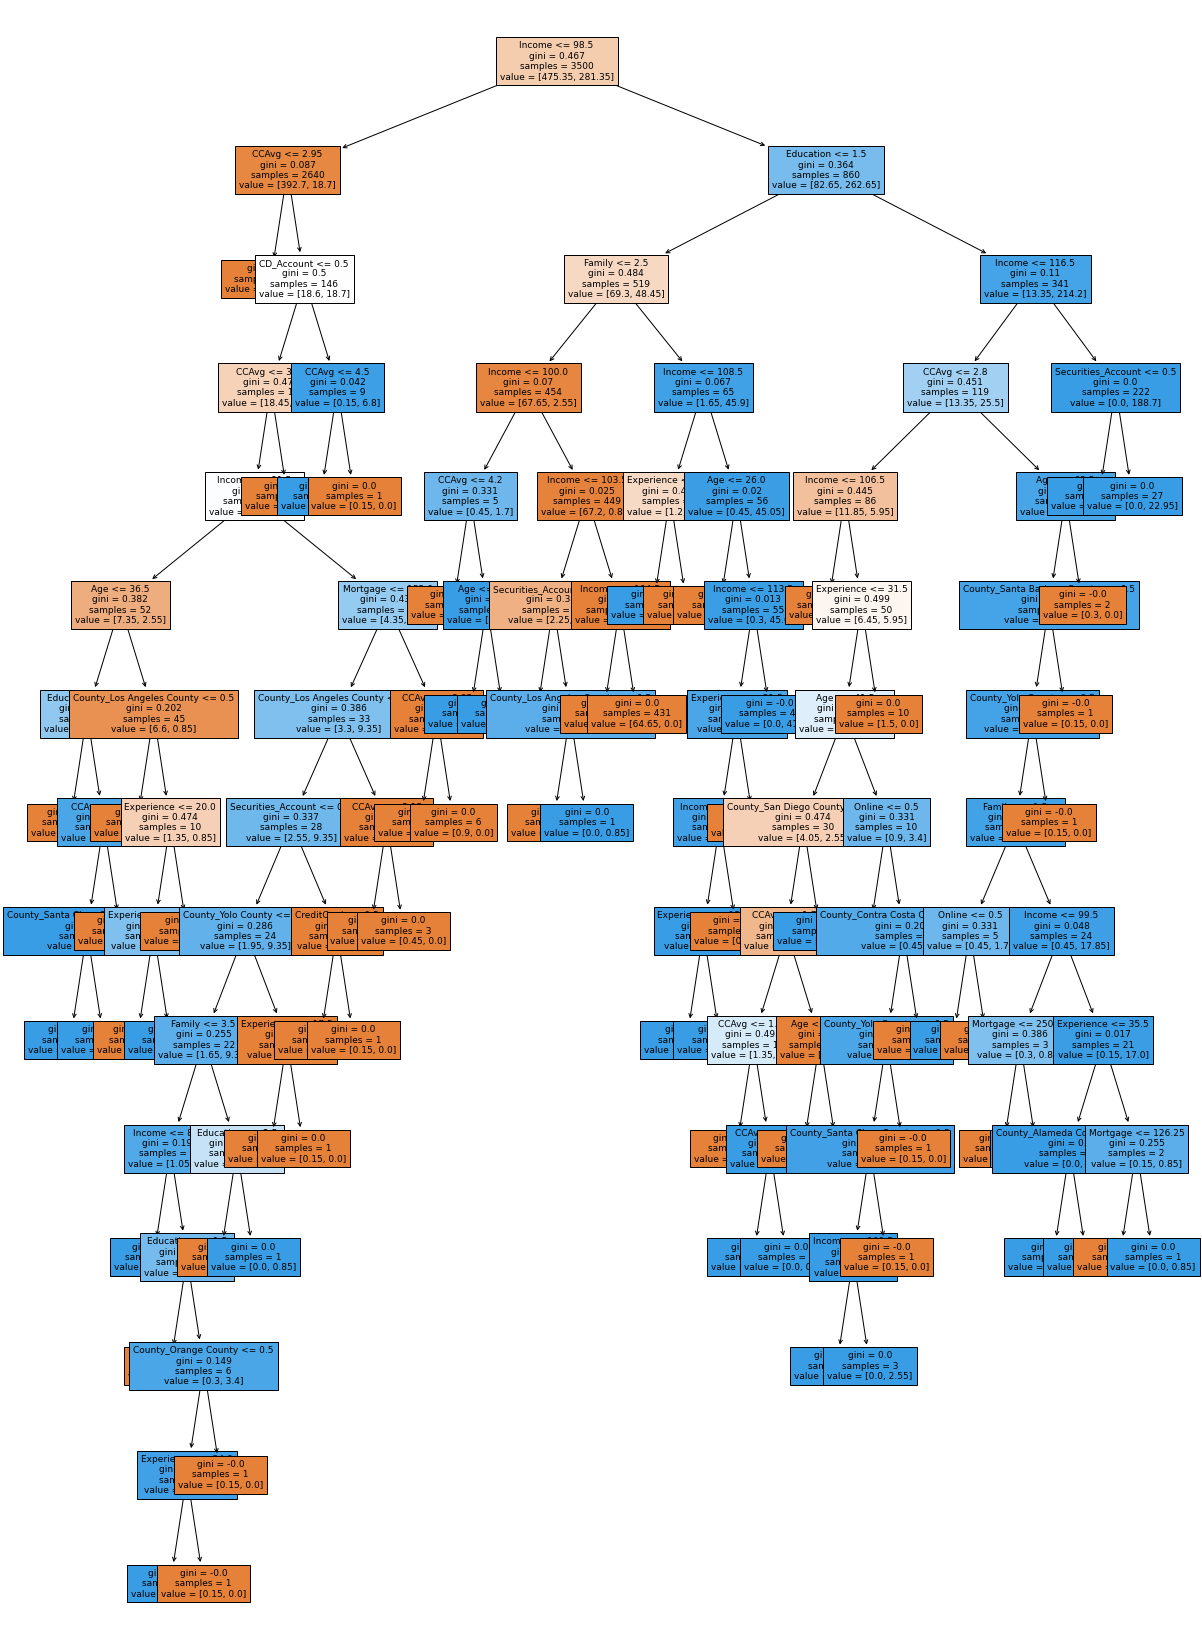

<IPython.core.display.Javascript object>

In [118]:
# plot the model

plt.figure(figsize=(20, 30))
output = tree.plot_tree(
    decision_tree_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

# below code will add arrows to the decision tree split if they are missing
for line in output:
    arrow = line.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [119]:
# Text report showing the rules of a decision tree -

print(
    tree.export_text(
        decision_tree_model, feature_names=feature_names, show_weights=True
    )
)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |   |--- Education >  1.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- County_Santa Clara County <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |   |--- County_Santa Clara County >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- County_Los Angeles County <= 0.50
|   |   |   |   |   |   |   |--- weights: 

<IPython.core.display.Javascript object>

- The Decision Tree model visualization has many branches, which is very complicated. We would like to trim the branches and keep the important features.

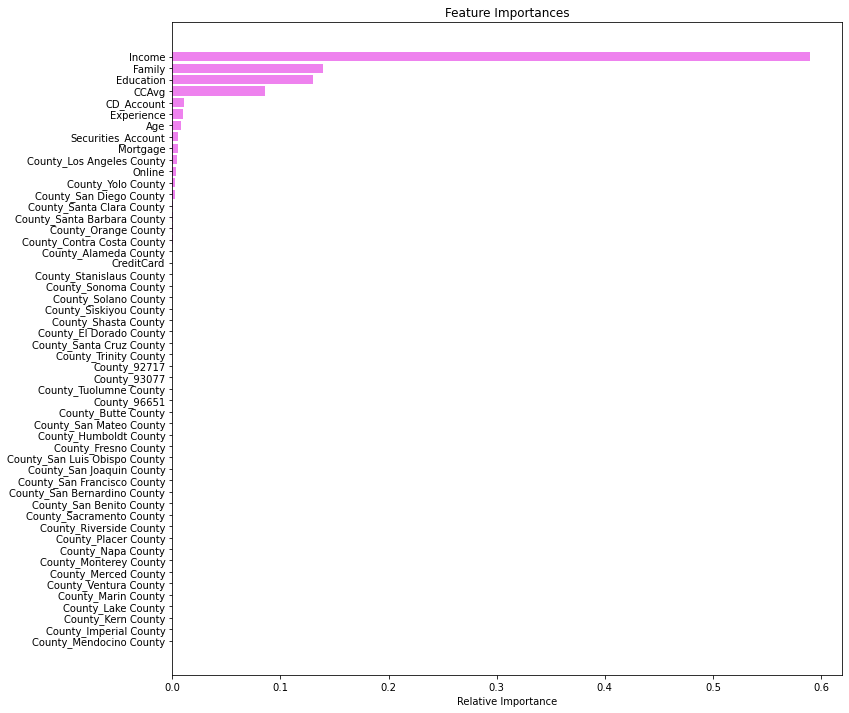

<IPython.core.display.Javascript object>

In [120]:
importances = decision_tree_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- As we can see, feature Income is the most important feature to predict if a customer will buy personal loan.
- Followed by Income, variable Family, Education, CCAvg are also important features for prediction.

## Pre-Pruning

### Reducing over fitting  - using GridSearch for hyperparameter tuning of Decision Tree model

- We are going to use GridSearch for hyperparameter tunning to attempt to reduce the model overfitting.
- GridSearch is a process of searching the best combination of hyperparameters, and return the combinations that work best for model evaluation.
- For pre-prunning, we will limit the hyperparameter such as max_depth and min_samples_split to prevent overfitting.

In [121]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=5,
                       min_impurity_decrease=1e-05, random_state=1)

<IPython.core.display.Javascript object>

### Checking performance on training set

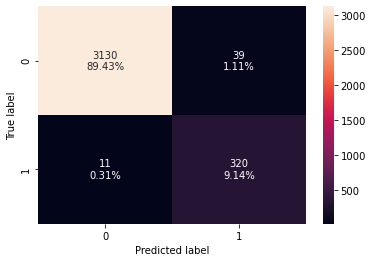

<IPython.core.display.Javascript object>

In [122]:
# apply confusion matrix on train dataset:
DT_confusion_matrix(estimator, x_train, y_train)

In [123]:
# calculate DT model metrics on train dataset:
DT_train_metrics_gridsearch = DT_model_metrics(estimator, x_train, y_train)
DT_train_metrics_gridsearch

,Accuracy,Recall,Precision,F1
0,0.985714,0.966767,0.891365,0.927536


<IPython.core.display.Javascript object>

### Checking performance on testing set

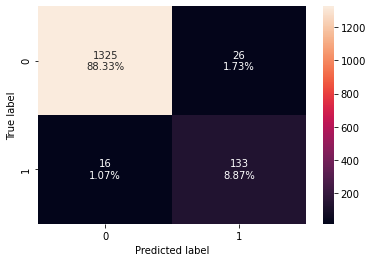

<IPython.core.display.Javascript object>

In [124]:
# apply confusion matrix on test dataset:
DT_confusion_matrix(estimator, x_test, y_test)

In [125]:
# calculate DT model metrics on test dataset:
DT_test_metrics_gridsearch = DT_model_metrics(estimator, x_test, y_test)
DT_test_metrics_gridsearch

,Accuracy,Recall,Precision,F1
0,0.972,0.892617,0.836478,0.863636


<IPython.core.display.Javascript object>

- Based on the result, the F1 score for gridsearch is a bit better than the original Decision Tree model.

### Visualizing the Decision Tree

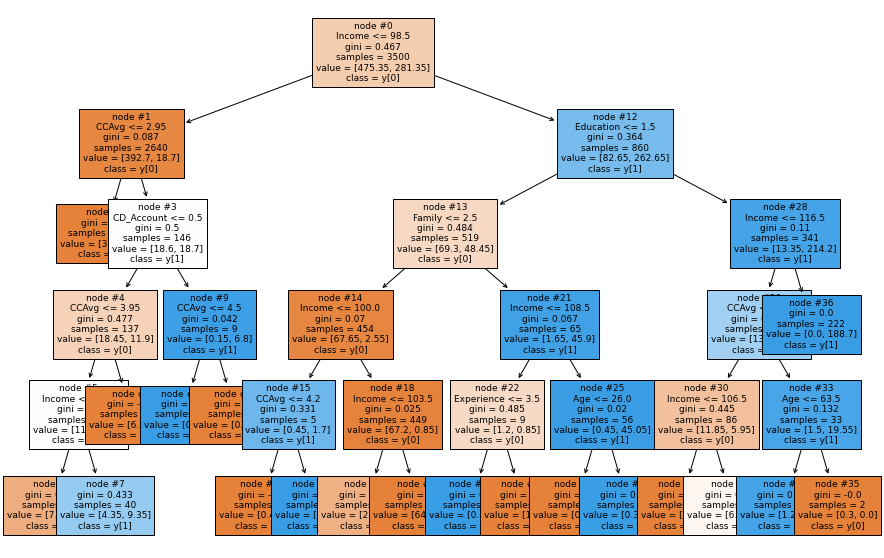

<IPython.core.display.Javascript object>

In [126]:
plt.figure(figsize=(15, 10))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [127]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- weights: [7.35, 2.55] class: 0
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- weights: [4.35, 9.35] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [6.75, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- CCAvg <= 4.50
|   |   |   |   |--- weights: [0.00, 6.80] class: 1
|   |   |   |--- CCAvg >  4.50
|   |   |   |   |--- weights: [0.15, 0.00] class: 0
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 100.00
|   |   |   |   |--- CCAvg <= 4.20
|   |   |   |   |   |--- weights: [0.45, 0.00] class: 0
|   |   |   |   |--- CCAvg >  4.20
|   |   |   |   |   |--- weights: [0.00, 1.70] class: 1
|   |   |   |--- Income >  100.00
|   |   |   |   |--- Income <= 

<IPython.core.display.Javascript object>

**Observeration**

- Based on the extraction from the above Decision Tree rules, we can interpret the results, such as:
    - If a customer has income less than 98 thousand dollars and CCAvg less than 2.95 thousand dollars, then the customer will not buy the personal loan. 
    - But if a customer has CCAVG more than 2.95 thousand dollars but less than 3.95, no CD_ACCount with the bank, and income is more than 81 thousand dollars, then the customer will buy the personal loan.
    
`Interpretations from other decision rules can be made similarly`

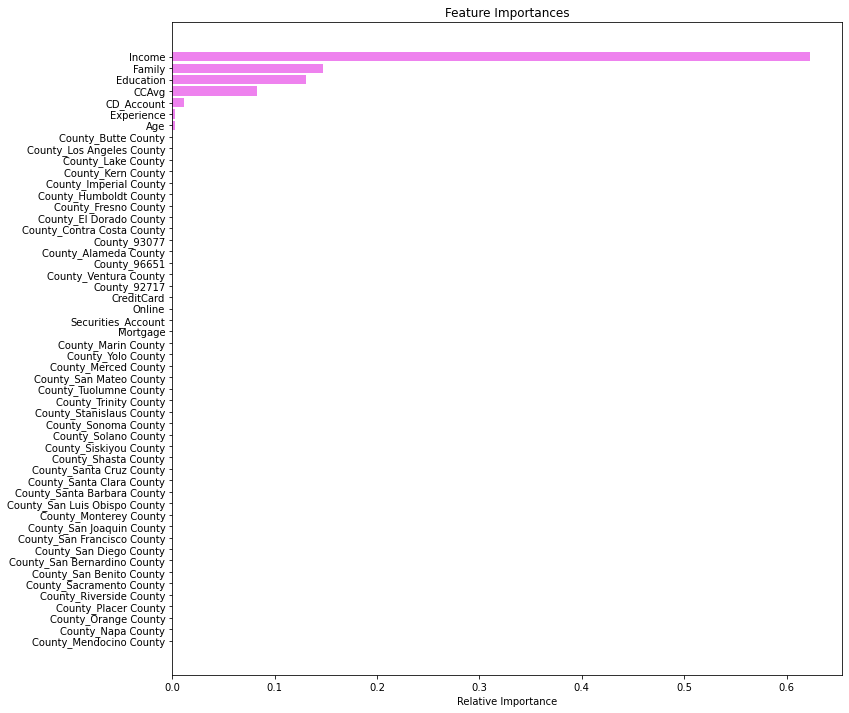

<IPython.core.display.Javascript object>

In [128]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- As we can see, the Decision Tree visualization has been simplified after pre-pruning. 
- We are going to try post-pruning technique, is also known as cost-complexity pruning, to see of the result is better.

## Post-Pruning

- For post-pruning, we are going to choose appropriate value of ccp_alpha and remove the less significant sub-tree nodes.

In [129]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [130]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000186,0.000559
2,0.000187,0.001121
3,0.000269,0.002195
4,0.000270,0.002735
5,0.000273,0.004371
6,0.000359,0.005447
7,0.000381,0.005828
8,0.000381,0.006209
9,0.000381,0.006590


<IPython.core.display.Javascript object>

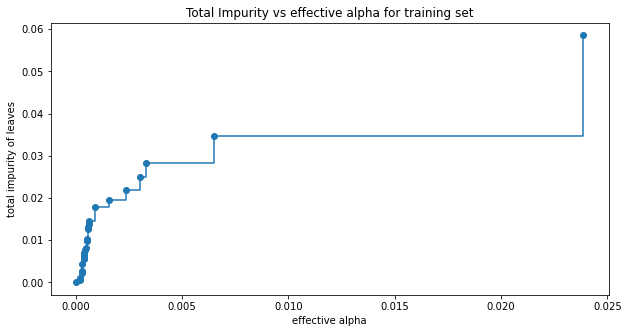

<IPython.core.display.Javascript object>

In [131]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

- We are going to use ccp_alpha values to train the Decision Tree model.

In [132]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


<IPython.core.display.Javascript object>

- The number of nodes in the last tree is 1 because the last value of ccp_alpha is the value that prunes the whole tree, leaving the tree with one node as shown below.

In [133]:
clfs

[DecisionTreeClassifier(random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.00018633540372670792, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.00018719211822660126, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.00026869682042095835, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.0002699474438604879, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.0002726902726902725, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.00035854341736694684, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.0003809523809523809, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.0003809523809523809, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.0003809523809523809, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.0003809523809523809, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.00040816326530612246, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.0004761904761904762, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.000513818320269933, random_sta

<IPython.core.display.Javascript object>

- Since the last value has only 1 node, we are going to remove it from the ccp_alpha.

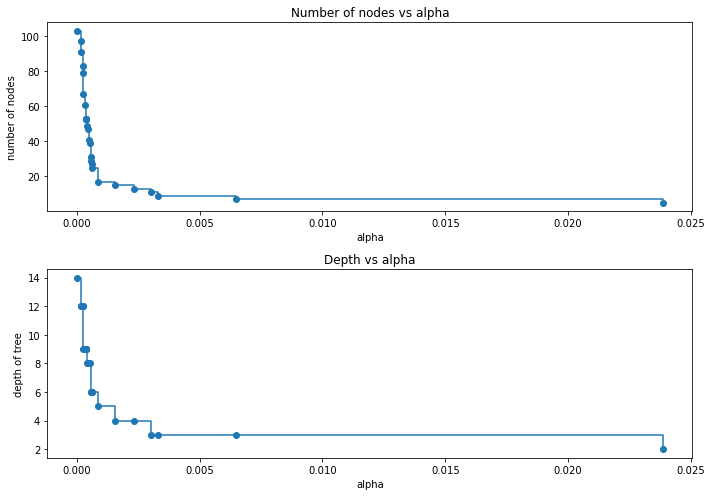

<IPython.core.display.Javascript object>

In [134]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Recall vs alpha for training and testing sets

In [135]:
recall_train = []
for clf in clfs:
    pred_train3 = clf.predict(x_train)
    values_train = metrics.recall_score(y_train, pred_train3)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [136]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(x_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

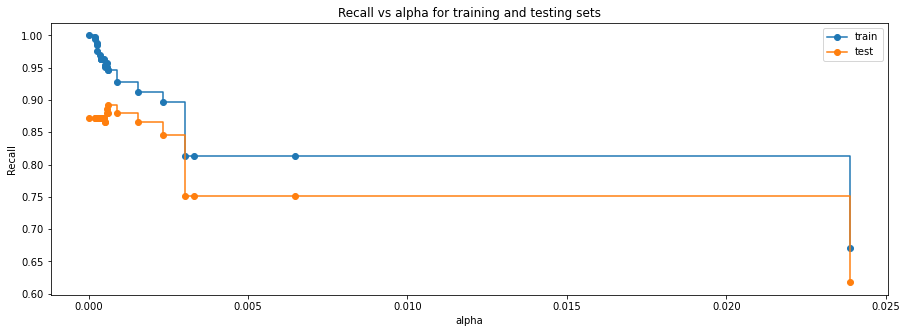

<IPython.core.display.Javascript object>

In [137]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

- The maximum value of Recall score is 0.024. However, Recall score of 0.003 would be better since it would retain the information and get higher score.

In [138]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216, random_state=1)


<IPython.core.display.Javascript object>

## Check model performances

#### Checking model performance on training set

In [139]:
# calculate DT model metrics on train dataset:
post_pruning_train_metrics = DT_model_metrics(best_model, x_train, y_train)
post_pruning_train_metrics

,Accuracy,Recall,Precision,F1
0,0.991429,0.945619,0.963077,0.954268


<IPython.core.display.Javascript object>

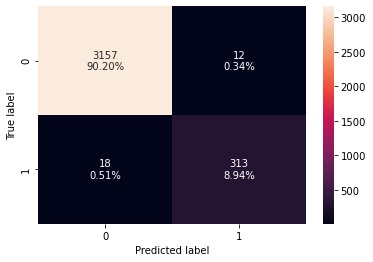

<IPython.core.display.Javascript object>

In [140]:
# apply confusion matrix on train dataset:
DT_confusion_matrix(best_model, x_train, y_train)

#### Checking model performance on test set

In [141]:
# calculate DT model metrics on test dataset:
post_pruning_test_metrics = DT_model_metrics(best_model, x_test, y_test)
post_pruning_test_metrics

,Accuracy,Recall,Precision,F1
0,0.982667,0.892617,0.93007,0.910959


<IPython.core.display.Javascript object>

- The result has improved from initial model.
- With post-pruning results, the F1 score has improved.

## Visualizing the Decision Tree

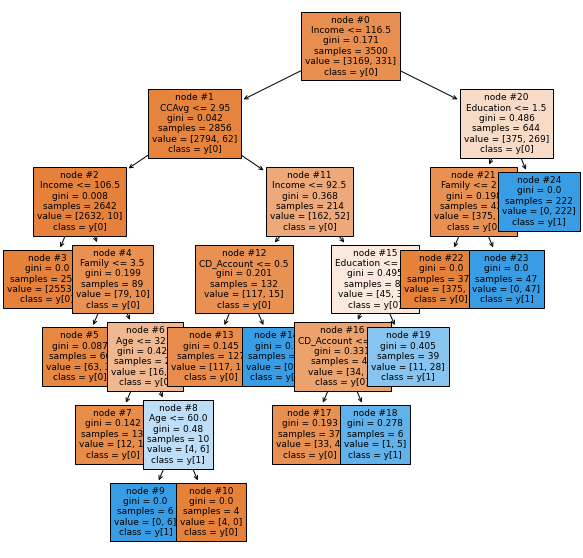

<IPython.core.display.Javascript object>

In [142]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [143]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [63.00, 3.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 32.50
|   |   |   |   |   |--- weights: [12.00, 1.00] class: 0
|   |   |   |   |--- Age >  32.50
|   |   |   |   |   |--- Age <= 60.00
|   |   |   |   |   |   |--- weights: [0.00, 6.00] class: 1
|   |   |   |   |   |--- Age >  60.00
|   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   | 

<IPython.core.display.Javascript object>

In [144]:
# importance of features in the tree building, is also known as Gini importance
print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
Education                      0.437917
Income                         0.325272
Family                         0.156373
CCAvg                          0.041281
CD_Account                     0.024775
Age                            0.014382
County_Santa Barbara County    0.000000
County_Riverside County        0.000000
County_Sacramento County       0.000000
County_San Benito County       0.000000
County_San Bernardino County   0.000000
County_San Diego County        0.000000
County_San Francisco County    0.000000
County_San Joaquin County      0.000000
County_San Luis Obispo County  0.000000
County_San Mateo County        0.000000
County_Shasta County           0.000000
County_Santa Clara County      0.000000
County_Santa Cruz County       0.000000
County_Orange County           0.000000
County_Siskiyou County         0.000000
County_Solano County           0.000000
County_Sonoma County           0.000000
County_Stanislaus County       0.000000


<IPython.core.display.Javascript object>

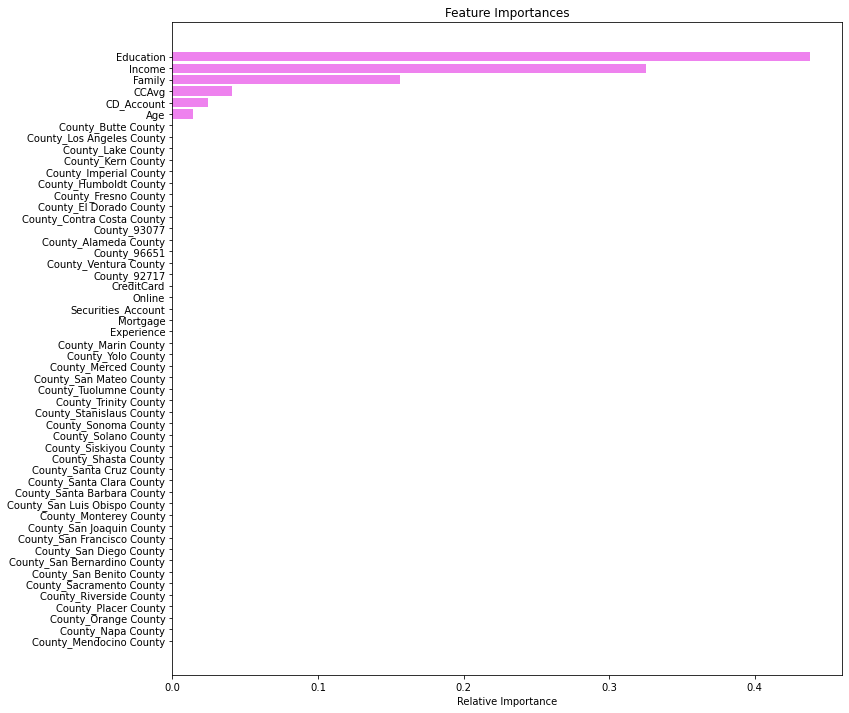

<IPython.core.display.Javascript object>

In [145]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Variable Education, Income, Family, CCAvg, CD_Account, and Age are the important features.

## Comparing all the decision tree models

### Training performance comparison


In [146]:
models_train_comp_df = pd.concat(
    [
        logistic_train_metrics.T,
        logistic_train_metrics_auc_roc.T,
        logistic_train_metrics_pre_recall.T,
        DT_train_metrics.T,
        DT_train_metrics_gridsearch.T,
        post_pruning_train_metrics.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic_Regression_Threshold_0.5",
    "Logistic_Regression_Threshold_0.117",
    "Logistic_Regression_Threshold_0.38",
    "Decision Tree",
    "Pre-Pruning Decision Tree",
    "Post-Pruning Decision Tree",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic_Regression_Threshold_0.5,Logistic_Regression_Threshold_0.117,Logistic_Regression_Threshold_0.38,Decision Tree,Pre-Pruning Decision Tree,Post-Pruning Decision Tree
Accuracy,0.960571,0.911429,0.953714,1.0,0.985714,0.991429
Recall,0.688822,0.894260,0.722054,1.0,0.966767,0.945619
Precision,0.866920,0.518389,0.773463,1.0,0.891365,0.963077
F1,0.767677,0.656319,0.746875,1.0,0.927536,0.954268


<IPython.core.display.Javascript object>

## Testing performance comparison

In [147]:
models_test_comp_df = pd.concat(
    [
        logistic_test_metrics.T,
        logistic_test_metrics_auc_roc.T,
        logistic_test_metrics_pre_recall.T,
        DT_test_metrics.T,
        DT_test_metrics_gridsearch.T,
        post_pruning_test_metrics.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic_Regression_Threshold_0.5",
    "Logistic_Regression_Threshold_0.117",
    "Logistic_Regression_Threshold_0.38",
    "Decision Tree",
    "Pre-Pruning Decision Tree",
    "Post-Pruning Decision Tree",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Logistic_Regression_Threshold_0.5,Logistic_Regression_Threshold_0.117,Logistic_Regression_Threshold_0.38,Decision Tree,Pre-Pruning Decision Tree,Post-Pruning Decision Tree
Accuracy,0.946667,0.908667,0.943333,0.973333,0.972000,0.982667
Recall,0.577181,0.852349,0.657718,0.845638,0.892617,0.892617
Precision,0.834951,0.524793,0.742424,0.881119,0.836478,0.930070
F1,0.682540,0.649616,0.697509,0.863014,0.863636,0.910959


<IPython.core.display.Javascript object>

**Observation**

- Based on the results, the post-pruning Decision Tree model yields the best F1 score, even though Recall scores of pre-pruning and post-pruning model are the same.
- Hence, the Decision Tree with post-pruning is the best out of 6 models, with Recall = 0.893 and F1 = 0.911.

# Conclusions

- Personal Loan Campaign was analyzed with different techniques: Logistic Regression and Decision Tree.
- The Decision Tree model with post-pruning yields the best result, with Recall = 0.893 and F1 = 0.911.
- Variable Education, Income, Family, CCAvg, CD_Account, and Age are the important features from post-pruning model.
- With pruning technique, the Decision Tree model was simplified and easy to interpret.

# Business Recommendations

- Education, Income, Family, CCAvg, CD_Account, and Age are the most important factors to predict if a customer will buy a personal loan or not.

- If income of a customer is more than 116 thousand dollars, there are two scenarios:
    - If education is above undergraduate, then the customer will likely buy the personal loan.
    - If education is undergraduate or less, and family size of more than 2 people, the customer will likely buy the personal loan. If family size is less than 2 people, then customer won't buy the personal loan.

- If income of customer ranges from 106 to 116 thousand dollars and average spending on credit card less than 3 thousand dollars, the marketing team should target the family size that has more than 3 people, and the adults with age range from 32 to 60 years old, the customers will likey buy the personal loan.

- If the average spending on credit card more than 3 thousand dollars, income is less than 92 thousand dollars and have certificate of deposit (CD) account, the customers will likely buy the personal loan.

- If the average spending on credit card more than 3 thousand dollars, income is more than 92 thousand dollars, have CD account but the education is only undergraduate or less, the customers will likely buy the personal loan. If customers that have higher education but dont' have CD account, they will also buy the personal loan. The marketing team should target more with these type of customers.



